### Finalizing the data tables

Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import os
os.chdir("../scripts/")
import functions as f
import time_series_functions as ts
os.chdir("../Notebooks/")

In [3]:
df = pd.read_csv("Checkpoint3.csv")
df.drop(["Unnamed: 0","ND"],axis=1,inplace=True)
df.set_index("SETTLEMENT_DATE",inplace = True)
df

zone_name   hh_zonal  nhh_zonal   residual  year  \
SETTLEMENT_DATE                                                             
2007-12-31       Southern Scotland   6.362303   0.830136  14.061505  2007   
2007-12-31                Northern   9.884146   1.287148  14.061505  2007   
2007-12-31              North West  13.646168   1.734890  14.061505  2007   
2007-12-31               Yorkshire  13.615270   1.750626  14.061505  2007   
2007-12-31        N Wales & Mersey  14.084355   1.805802  14.061505  2007   
...                            ...        ...        ...        ...   ...   
2018-12-31             South Wales  45.804410   5.552697  46.933426  2018   
2018-12-31              South East  52.110398   7.713198  46.933426  2018   
2018-12-31                  London  54.906683   6.106170  46.933426  2018   
2018-12-31                Southern  53.419807   7.317489  46.933426  2018   
2018-12-31           South Western  51.867520   7.560093  46.933426  2018   

                    log_ND  inflation  operation_cost  amortization  
SETTLEMENT_DATE                                                      
2007-12-31       20.319042   5.588235            1433           245  
2007-12-31       20.319042   5.588235            1433           245  
2007-12-31       20.319042   5.588235            1433           245  
2007-12-31       20.319042   5.588235            1433           245  
2007-12-31       20.319042   5.588235            1433           245  
...                    ...        ...             ...           ...  
2018-12-31       20.087578   6.866538            3125           464  
2018-12-31       20.087578   6.866538            3125           464  
2018-12-31       20.087578   6.866538            3125           464  
2018-12-31       20.087578   6.866538            3125           464  
2018-12-31       20.087578   6.866538            3125           464  

[166 rows x 9 columns]

### get revenue data

In [4]:
#from the helper functions
#rev = f.get_op_cost()
#rev = rev[["year","Revenue"]]

In [5]:
rev = pd.read_csv("../data/reports_from_nget/Op_cost_and_revenue.csv")

In [6]:
rev

Year  Page  Operating_cost  Revenue  Total liabilities  Net payroll costs  \
0   2007    43            1443     1991               5887                 89   
1   2008    42            1461     2106               6299                 94   
2   2009    42            1848     2566               6681                111   
3   2010    39            1693     2484               6885                 97   
4   2011    40            1730     2549               7022                112   
5   2012    51            1948     2813               8178                121   
6   2013    43            2102     3111               9854                104   
7   2014    42            2375     3393               9559                120   
8   2015    42            2529     3713              10467                133   
9   2016    42            2818     3979              10405                141   
10  2017    49            3093     4493              10801                156   
11  2018    47            3125     4158              10682                181   
12  2019    51            2355     3353              10577                182   

    Number of Employees  Tax  
0                  2073  126  
1                  2288  140  
2                  2352  153  
3                  2488  183  
4                  2784  139  
5                  2978  101  
6                  3229  161  
7                  3044   79  
8                  3270  203  
9                  3520  114  
10                 3692   87  
11                 3679  165  
12                 3380  119

In [7]:
df

zone_name   hh_zonal  nhh_zonal   residual  year  \
SETTLEMENT_DATE                                                             
2007-12-31       Southern Scotland   6.362303   0.830136  14.061505  2007   
2007-12-31                Northern   9.884146   1.287148  14.061505  2007   
2007-12-31              North West  13.646168   1.734890  14.061505  2007   
2007-12-31               Yorkshire  13.615270   1.750626  14.061505  2007   
2007-12-31        N Wales & Mersey  14.084355   1.805802  14.061505  2007   
...                            ...        ...        ...        ...   ...   
2018-12-31             South Wales  45.804410   5.552697  46.933426  2018   
2018-12-31              South East  52.110398   7.713198  46.933426  2018   
2018-12-31                  London  54.906683   6.106170  46.933426  2018   
2018-12-31                Southern  53.419807   7.317489  46.933426  2018   
2018-12-31           South Western  51.867520   7.560093  46.933426  2018   

                    log_ND  inflation  operation_cost  amortization  
SETTLEMENT_DATE                                                      
2007-12-31       20.319042   5.588235            1433           245  
2007-12-31       20.319042   5.588235            1433           245  
2007-12-31       20.319042   5.588235            1433           245  
2007-12-31       20.319042   5.588235            1433           245  
2007-12-31       20.319042   5.588235            1433           245  
...                    ...        ...             ...           ...  
2018-12-31       20.087578   6.866538            3125           464  
2018-12-31       20.087578   6.866538            3125           464  
2018-12-31       20.087578   6.866538            3125           464  
2018-12-31       20.087578   6.866538            3125           464  
2018-12-31       20.087578   6.866538            3125           464  

[166 rows x 9 columns]

In [8]:
#merging the two dataframes
df = df.reset_index().merge(rev,left_on="year",right_on="Year").set_index("SETTLEMENT_DATE")
df

zone_name   hh_zonal  nhh_zonal   residual  year  \
SETTLEMENT_DATE                                                             
2007-12-31       Southern Scotland   6.362303   0.830136  14.061505  2007   
2007-12-31                Northern   9.884146   1.287148  14.061505  2007   
2007-12-31              North West  13.646168   1.734890  14.061505  2007   
2007-12-31               Yorkshire  13.615270   1.750626  14.061505  2007   
2007-12-31        N Wales & Mersey  14.084355   1.805802  14.061505  2007   
...                            ...        ...        ...        ...   ...   
2018-12-31             South Wales  45.804410   5.552697  46.933426  2018   
2018-12-31              South East  52.110398   7.713198  46.933426  2018   
2018-12-31                  London  54.906683   6.106170  46.933426  2018   
2018-12-31                Southern  53.419807   7.317489  46.933426  2018   
2018-12-31           South Western  51.867520   7.560093  46.933426  2018   

                    log_ND  inflation  operation_cost  amortization  Year  \
SETTLEMENT_DATE                                                             
2007-12-31       20.319042   5.588235            1433           245  2007   
2007-12-31       20.319042   5.588235            1433           245  2007   
2007-12-31       20.319042   5.588235            1433           245  2007   
2007-12-31       20.319042   5.588235            1433           245  2007   
2007-12-31       20.319042   5.588235            1433           245  2007   
...                    ...        ...             ...           ...   ...   
2018-12-31       20.087578   6.866538            3125           464  2018   
2018-12-31       20.087578   6.866538            3125           464  2018   
2018-12-31       20.087578   6.866538            3125           464  2018   
2018-12-31       20.087578   6.866538            3125           464  2018   
2018-12-31       20.087578   6.866538            3125           464  2018   

                 Page  Operating_cost  Revenue  Total liabilities  \
SETTLEMENT_DATE                                                     
2007-12-31         43            1443     1991               5887   
2007-12-31         43            1443     1991               5887   
2007-12-31         43            1443     1991               5887   
2007-12-31         43            1443     1991               5887   
2007-12-31         43            1443     1991               5887   
...               ...             ...      ...                ...   
2018-12-31         47            3125     4158              10682   
2018-12-31         47            3125     4158              10682   
2018-12-31         47            3125     4158              10682   
2018-12-31         47            3125     4158              10682   
2018-12-31         47            3125     4158              10682   

                 Net payroll costs  Number of Employees  Tax  
SETTLEMENT_DATE                                               
2007-12-31                      89                 2073  126  
2007-12-31                      89                 2073  126  
2007-12-31                      89                 2073  126  
2007-12-31                      89                 2073  126  
2007-12-31                      89                 2073  126  
...                            ...                  ...  ...  
2018-12-31                     181                 3679  165  
2018-12-31                     181                 3679  165  
2018-12-31                     181                 3679  165  
2018-12-31                     181                 3679  165  
2018-12-31                     181                 3679  165  

[166 rows x 17 columns]

#### Changing column names all to lowercase

In [9]:
df.columns = map(str.lower, df.columns)

In [10]:
df.drop("page",axis=1,inplace=True)
df

zone_name   hh_zonal  nhh_zonal   residual  year  \
SETTLEMENT_DATE                                                             
2007-12-31       Southern Scotland   6.362303   0.830136  14.061505  2007   
2007-12-31                Northern   9.884146   1.287148  14.061505  2007   
2007-12-31              North West  13.646168   1.734890  14.061505  2007   
2007-12-31               Yorkshire  13.615270   1.750626  14.061505  2007   
2007-12-31        N Wales & Mersey  14.084355   1.805802  14.061505  2007   
...                            ...        ...        ...        ...   ...   
2018-12-31             South Wales  45.804410   5.552697  46.933426  2018   
2018-12-31              South East  52.110398   7.713198  46.933426  2018   
2018-12-31                  London  54.906683   6.106170  46.933426  2018   
2018-12-31                Southern  53.419807   7.317489  46.933426  2018   
2018-12-31           South Western  51.867520   7.560093  46.933426  2018   

                    log_nd  inflation  operation_cost  amortization  year  \
SETTLEMENT_DATE                                                             
2007-12-31       20.319042   5.588235            1433           245  2007   
2007-12-31       20.319042   5.588235            1433           245  2007   
2007-12-31       20.319042   5.588235            1433           245  2007   
2007-12-31       20.319042   5.588235            1433           245  2007   
2007-12-31       20.319042   5.588235            1433           245  2007   
...                    ...        ...             ...           ...   ...   
2018-12-31       20.087578   6.866538            3125           464  2018   
2018-12-31       20.087578   6.866538            3125           464  2018   
2018-12-31       20.087578   6.866538            3125           464  2018   
2018-12-31       20.087578   6.866538            3125           464  2018   
2018-12-31       20.087578   6.866538            3125           464  2018   

                 operating_cost  revenue  total liabilities  \
SETTLEMENT_DATE                                               
2007-12-31                 1443     1991               5887   
2007-12-31                 1443     1991               5887   
2007-12-31                 1443     1991               5887   
2007-12-31                 1443     1991               5887   
2007-12-31                 1443     1991               5887   
...                         ...      ...                ...   
2018-12-31                 3125     4158              10682   
2018-12-31                 3125     4158              10682   
2018-12-31                 3125     4158              10682   
2018-12-31                 3125     4158              10682   
2018-12-31                 3125     4158              10682   

                 net payroll costs  number of employees  tax  
SETTLEMENT_DATE                                               
2007-12-31                      89                 2073  126  
2007-12-31                      89                 2073  126  
2007-12-31                      89                 2073  126  
2007-12-31                      89                 2073  126  
2007-12-31                      89                 2073  126  
...                            ...                  ...  ...  
2018-12-31                     181                 3679  165  
2018-12-31                     181                 3679  165  
2018-12-31                     181                 3679  165  
2018-12-31                     181                 3679  165  
2018-12-31                     181                 3679  165  

[166 rows x 16 columns]

In [11]:
#remove duplicate columns
df = df.loc[:,~df.columns.duplicated()]
df

zone_name   hh_zonal  nhh_zonal   residual  year  \
SETTLEMENT_DATE                                                             
2007-12-31       Southern Scotland   6.362303   0.830136  14.061505  2007   
2007-12-31                Northern   9.884146   1.287148  14.061505  2007   
2007-12-31              North West  13.646168   1.734890  14.061505  2007   
2007-12-31               Yorkshire  13.615270   1.750626  14.061505  2007   
2007-12-31        N Wales & Mersey  14.084355   1.805802  14.061505  2007   
...                            ...        ...        ...        ...   ...   
2018-12-31             South Wales  45.804410   5.552697  46.933426  2018   
2018-12-31              South East  52.110398   7.713198  46.933426  2018   
2018-12-31                  London  54.906683   6.106170  46.933426  2018   
2018-12-31                Southern  53.419807   7.317489  46.933426  2018   
2018-12-31           South Western  51.867520   7.560093  46.933426  2018   

                    log_nd  inflation  operation_cost  amortization  \
SETTLEMENT_DATE                                                       
2007-12-31       20.319042   5.588235            1433           245   
2007-12-31       20.319042   5.588235            1433           245   
2007-12-31       20.319042   5.588235            1433           245   
2007-12-31       20.319042   5.588235            1433           245   
2007-12-31       20.319042   5.588235            1433           245   
...                    ...        ...             ...           ...   
2018-12-31       20.087578   6.866538            3125           464   
2018-12-31       20.087578   6.866538            3125           464   
2018-12-31       20.087578   6.866538            3125           464   
2018-12-31       20.087578   6.866538            3125           464   
2018-12-31       20.087578   6.866538            3125           464   

                 operating_cost  revenue  total liabilities  \
SETTLEMENT_DATE                                               
2007-12-31                 1443     1991               5887   
2007-12-31                 1443     1991               5887   
2007-12-31                 1443     1991               5887   
2007-12-31                 1443     1991               5887   
2007-12-31                 1443     1991               5887   
...                         ...      ...                ...   
2018-12-31                 3125     4158              10682   
2018-12-31                 3125     4158              10682   
2018-12-31                 3125     4158              10682   
2018-12-31                 3125     4158              10682   
2018-12-31                 3125     4158              10682   

                 net payroll costs  number of employees  tax  
SETTLEMENT_DATE                                               
2007-12-31                      89                 2073  126  
2007-12-31                      89                 2073  126  
2007-12-31                      89                 2073  126  
2007-12-31                      89                 2073  126  
2007-12-31                      89                 2073  126  
...                            ...                  ...  ...  
2018-12-31                     181                 3679  165  
2018-12-31                     181                 3679  165  
2018-12-31                     181                 3679  165  
2018-12-31                     181                 3679  165  
2018-12-31                     181                 3679  165  

[166 rows x 15 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, 2007-12-31 to 2018-12-31
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zone_name            166 non-null    object 
 1   hh_zonal             166 non-null    float64
 2   nhh_zonal            166 non-null    float64
 3   residual             166 non-null    float64
 4   year                 166 non-null    int64  
 5   log_nd               166 non-null    float64
 6   inflation            166 non-null    float64
 7   operation_cost       166 non-null    int64  
 8   amortization         166 non-null    int64  
 9   operating_cost       166 non-null    int64  
 10  revenue              166 non-null    int64  
 11  total liabilities    166 non-null    int64  
 12  net payroll costs    166 non-null    int64  
 13  number of employees  166 non-null    int64  
 14  tax                  166 non-null    int64  
dtypes: float64(5), int64(9), obje

In [13]:
df.describe().T

count         mean          std          min  \
hh_zonal             166.0    29.346548    12.576155     3.379238   
nhh_zonal            166.0     4.005409     1.746695     0.459137   
residual             166.0    26.981432    13.809856     3.607933   
year                 166.0  2012.560241     3.438549  2007.000000   
log_nd               166.0    20.208600     0.077265    20.087578   
inflation            166.0     4.228755     6.185020    -7.749077   
operation_cost       166.0  2188.409639   575.292179  1433.000000   
amortization         166.0   317.873494    77.470477   221.000000   
operating_cost       166.0  2189.192771   574.263016  1443.000000   
revenue              166.0  3125.825301   792.193189  1991.000000   
total liabilities    166.0  8589.722892  1829.712574  5887.000000   
net payroll costs    166.0   121.945783    26.107530    89.000000   
number of employees  166.0  2959.018072   530.394530  2073.000000   
tax                  166.0   137.638554    36.726368    79.000000   

                             25%          50%           75%           max  
hh_zonal               20.108201    26.746971     39.528293     54.969649  
nhh_zonal               2.711067     3.658446      5.549472      7.713198  
residual               16.943694    25.408454     42.909108     47.260756  
year                 2010.000000  2013.000000   2015.750000   2018.000000  
log_nd                 20.133212    20.230591     20.260050     20.319042  
inflation               0.128705     5.010020      6.051282     17.130920  
operation_cost       1730.000000  2102.000000   2745.750000   3125.000000  
amortization          245.000000   325.000000    386.250000    464.000000  
operating_cost       1730.000000  2102.000000   2745.750000   3125.000000  
revenue              2549.000000  3111.000000   3912.500000   4493.000000  
total liabilities    6885.000000  9559.000000  10451.500000  10801.000000  
net payroll costs     104.000000   120.000000    139.000000    181.000000  
number of employees  2488.000000  3044.000000   3457.500000   3692.000000  
tax                   104.250000   139.500000    164.000000    203.000000

#### Getting the zones

In [14]:
zones = df.zone_name.unique()
for i in zones:
    print(i)

Southern Scotland
Northern
North West
Yorkshire
N Wales & Mersey
East Midlands
Midlands
Eastern
South Wales
South East
London
Southern
South Western
Northern Scotland


In [15]:
print(f'There are {len(zones)} zones')

There are 14 zones


### Importing plotly for nice viz

In [16]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode()

### HH zonal tariff for all 14 distribution zones

In [17]:
df

zone_name   hh_zonal  nhh_zonal   residual  year  \
SETTLEMENT_DATE                                                             
2007-12-31       Southern Scotland   6.362303   0.830136  14.061505  2007   
2007-12-31                Northern   9.884146   1.287148  14.061505  2007   
2007-12-31              North West  13.646168   1.734890  14.061505  2007   
2007-12-31               Yorkshire  13.615270   1.750626  14.061505  2007   
2007-12-31        N Wales & Mersey  14.084355   1.805802  14.061505  2007   
...                            ...        ...        ...        ...   ...   
2018-12-31             South Wales  45.804410   5.552697  46.933426  2018   
2018-12-31              South East  52.110398   7.713198  46.933426  2018   
2018-12-31                  London  54.906683   6.106170  46.933426  2018   
2018-12-31                Southern  53.419807   7.317489  46.933426  2018   
2018-12-31           South Western  51.867520   7.560093  46.933426  2018   

                    log_nd  inflation  operation_cost  amortization  \
SETTLEMENT_DATE                                                       
2007-12-31       20.319042   5.588235            1433           245   
2007-12-31       20.319042   5.588235            1433           245   
2007-12-31       20.319042   5.588235            1433           245   
2007-12-31       20.319042   5.588235            1433           245   
2007-12-31       20.319042   5.588235            1433           245   
...                    ...        ...             ...           ...   
2018-12-31       20.087578   6.866538            3125           464   
2018-12-31       20.087578   6.866538            3125           464   
2018-12-31       20.087578   6.866538            3125           464   
2018-12-31       20.087578   6.866538            3125           464   
2018-12-31       20.087578   6.866538            3125           464   

                 operating_cost  revenue  total liabilities  \
SETTLEMENT_DATE                                               
2007-12-31                 1443     1991               5887   
2007-12-31                 1443     1991               5887   
2007-12-31                 1443     1991               5887   
2007-12-31                 1443     1991               5887   
2007-12-31                 1443     1991               5887   
...                         ...      ...                ...   
2018-12-31                 3125     4158              10682   
2018-12-31                 3125     4158              10682   
2018-12-31                 3125     4158              10682   
2018-12-31                 3125     4158              10682   
2018-12-31                 3125     4158              10682   

                 net payroll costs  number of employees  tax  
SETTLEMENT_DATE                                               
2007-12-31                      89                 2073  126  
2007-12-31                      89                 2073  126  
2007-12-31                      89                 2073  126  
2007-12-31                      89                 2073  126  
2007-12-31                      89                 2073  126  
...                            ...                  ...  ...  
2018-12-31                     181                 3679  165  
2018-12-31                     181                 3679  165  
2018-12-31                     181                 3679  165  
2018-12-31                     181                 3679  165  
2018-12-31                     181                 3679  165  

[166 rows x 15 columns]

In [18]:
fig = px.line(data_frame=df, x="year", y="hh_zonal", title='HH zonal tariff in UK',color="zone_name")
fig.update_layout(
    yaxis_title="HH Zonal Tariff",
    xaxis_title="Year",
    font=dict(
        size=12,
        color="#7f7f7f"
    )
)

### Norther Scotland, Southern Scotland and Northern distribution zones HH charges are falling from 2016. All the other seems to have same trend(moving upwards)

In [19]:
df

zone_name   hh_zonal  nhh_zonal   residual  year  \
SETTLEMENT_DATE                                                             
2007-12-31       Southern Scotland   6.362303   0.830136  14.061505  2007   
2007-12-31                Northern   9.884146   1.287148  14.061505  2007   
2007-12-31              North West  13.646168   1.734890  14.061505  2007   
2007-12-31               Yorkshire  13.615270   1.750626  14.061505  2007   
2007-12-31        N Wales & Mersey  14.084355   1.805802  14.061505  2007   
...                            ...        ...        ...        ...   ...   
2018-12-31             South Wales  45.804410   5.552697  46.933426  2018   
2018-12-31              South East  52.110398   7.713198  46.933426  2018   
2018-12-31                  London  54.906683   6.106170  46.933426  2018   
2018-12-31                Southern  53.419807   7.317489  46.933426  2018   
2018-12-31           South Western  51.867520   7.560093  46.933426  2018   

                    log_nd  inflation  operation_cost  amortization  \
SETTLEMENT_DATE                                                       
2007-12-31       20.319042   5.588235            1433           245   
2007-12-31       20.319042   5.588235            1433           245   
2007-12-31       20.319042   5.588235            1433           245   
2007-12-31       20.319042   5.588235            1433           245   
2007-12-31       20.319042   5.588235            1433           245   
...                    ...        ...             ...           ...   
2018-12-31       20.087578   6.866538            3125           464   
2018-12-31       20.087578   6.866538            3125           464   
2018-12-31       20.087578   6.866538            3125           464   
2018-12-31       20.087578   6.866538            3125           464   
2018-12-31       20.087578   6.866538            3125           464   

                 operating_cost  revenue  total liabilities  \
SETTLEMENT_DATE                                               
2007-12-31                 1443     1991               5887   
2007-12-31                 1443     1991               5887   
2007-12-31                 1443     1991               5887   
2007-12-31                 1443     1991               5887   
2007-12-31                 1443     1991               5887   
...                         ...      ...                ...   
2018-12-31                 3125     4158              10682   
2018-12-31                 3125     4158              10682   
2018-12-31                 3125     4158              10682   
2018-12-31                 3125     4158              10682   
2018-12-31                 3125     4158              10682   

                 net payroll costs  number of employees  tax  
SETTLEMENT_DATE                                               
2007-12-31                      89                 2073  126  
2007-12-31                      89                 2073  126  
2007-12-31                      89                 2073  126  
2007-12-31                      89                 2073  126  
2007-12-31                      89                 2073  126  
...                            ...                  ...  ...  
2018-12-31                     181                 3679  165  
2018-12-31                     181                 3679  165  
2018-12-31                     181                 3679  165  
2018-12-31                     181                 3679  165  
2018-12-31                     181                 3679  165  

[166 rows x 15 columns]

In [19]:
fig = px.scatter(x = "hh_zonal",y = "revenue",color="zone_name",data_frame=df,title="Relationship between Revenue and HH Zonal Tariff",)
fig.update_layout(
    xaxis_title="HH Zonal Tariff",
    yaxis_title="Revenue of NGET in milions",
    font=dict(
        size=12,
        color="#7f7f7f"
    ))

### Relationship between HH zonal and NGET Revenue in mil pounds

In [20]:
for i in zones:
    fig = px.scatter(x = "hh_zonal",y = "revenue",data_frame=df[df.zone_name==i],title="Relationship between Revenue and HH Zonal Tariff in "+i,)
    
    fig.update_layout(
    xaxis_title="HH Zonal Tariff in ",
    yaxis_title="Revenue of NGET in milions",
    font=dict(
        size=12,
        color="#000000"
    ))
    px.get_trendline_results(fig)
    fig.show()

In [24]:
df

zone_name   hh_zonal  nhh_zonal   residual  year  \
SETTLEMENT_DATE                                                             
2007-12-31       Southern Scotland   6.362303   0.830136  14.061505  2007   
2007-12-31                Northern   9.884146   1.287148  14.061505  2007   
2007-12-31              North West  13.646168   1.734890  14.061505  2007   
2007-12-31               Yorkshire  13.615270   1.750626  14.061505  2007   
2007-12-31        N Wales & Mersey  14.084355   1.805802  14.061505  2007   
...                            ...        ...        ...        ...   ...   
2018-12-31             South Wales  45.804410   5.552697  46.933426  2018   
2018-12-31              South East  52.110398   7.713198  46.933426  2018   
2018-12-31                  London  54.906683   6.106170  46.933426  2018   
2018-12-31                Southern  53.419807   7.317489  46.933426  2018   
2018-12-31           South Western  51.867520   7.560093  46.933426  2018   

                    log_nd  inflation  operation_cost  amortization  \
SETTLEMENT_DATE                                                       
2007-12-31       20.319042   5.588235            1433           245   
2007-12-31       20.319042   5.588235            1433           245   
2007-12-31       20.319042   5.588235            1433           245   
2007-12-31       20.319042   5.588235            1433           245   
2007-12-31       20.319042   5.588235            1433           245   
...                    ...        ...             ...           ...   
2018-12-31       20.087578   6.866538            3125           464   
2018-12-31       20.087578   6.866538            3125           464   
2018-12-31       20.087578   6.866538            3125           464   
2018-12-31       20.087578   6.866538            3125           464   
2018-12-31       20.087578   6.866538            3125           464   

                 operating_cost  revenue  total liabilities  \
SETTLEMENT_DATE                                               
2007-12-31                 1443     1991               5887   
2007-12-31                 1443     1991               5887   
2007-12-31                 1443     1991               5887   
2007-12-31                 1443     1991               5887   
2007-12-31                 1443     1991               5887   
...                         ...      ...                ...   
2018-12-31                 3125     4158              10682   
2018-12-31                 3125     4158              10682   
2018-12-31                 3125     4158              10682   
2018-12-31                 3125     4158              10682   
2018-12-31                 3125     4158              10682   

                 net payroll costs  number of employees  tax  
SETTLEMENT_DATE                                               
2007-12-31                      89                 2073  126  
2007-12-31                      89                 2073  126  
2007-12-31                      89                 2073  126  
2007-12-31                      89                 2073  126  
2007-12-31                      89                 2073  126  
...                            ...                  ...  ...  
2018-12-31                     181                 3679  165  
2018-12-31                     181                 3679  165  
2018-12-31                     181                 3679  165  
2018-12-31                     181                 3679  165  
2018-12-31                     181                 3679  165  

[166 rows x 15 columns]

NameError: name 'x' is not defined

In [21]:
fig = px.scatter(data_frame=df, x="hh_zonal", y="log_nd",title="National Demand and HH Zonal Tariff")
fig.update_layout(
    yaxis_title="Logarithm of National Demand",
    xaxis_title="HH_Zonal_Tarrif",
    font=dict(
        size=12,
        color="#000000"
    )
)
fig.show()
print("The Pearson coefficient is",df.log_nd.corr(df.hh_zonal))

The Pearson coefficient is -0.8480758850207735


### Relationship between National Demand and HH zonal tariff

In [22]:
for i in zones:
    fig = px.scatter(x = "hh_zonal",y = "log_nd",data_frame=df[df.zone_name==i],title="Relationship between Revenue and HH Zonal Tariff in "+i,trendline="ols")
    
    fig.update_layout(
    xaxis_title="HH Zonal Tariff in ",
    yaxis_title="Log od National Demand",
    font=dict(
        size=12,
        color="#000000"
    ))
    results = px.get_trendline_results(fig)
    print(f'The Pearson correlation coefficiet is{df[df.zone_name==i]["hh_zonal"].corr(df[df.zone_name==i]["log_nd"])}')
    fig.show()

The Pearson correlation coefficiet is-0.9205693032130077


The Pearson correlation coefficiet is-0.9623120785724047


The Pearson correlation coefficiet is-0.9810004519467502


The Pearson correlation coefficiet is-0.9824622370157239


The Pearson correlation coefficiet is-0.9819482718845769


The Pearson correlation coefficiet is-0.9839115151006796


The Pearson correlation coefficiet is-0.9835004124870806


The Pearson correlation coefficiet is-0.9824989174425803


The Pearson correlation coefficiet is-0.965243551930403


The Pearson correlation coefficiet is-0.9864094111910509


The Pearson correlation coefficiet is-0.9835459441120357


The Pearson correlation coefficiet is-0.9868479320107413


The Pearson correlation coefficiet is-0.9815630447405961


The Pearson correlation coefficiet is-0.8891287088576414


### So definetly the the damand and log of the National Demand are negatively correlated as seen from above. The pearson coeff is almost -1 for every distribution zone

### Plotting the relationship between inflation and hh zonal tariff

In [23]:
for i in zones:
    fig = px.scatter(x="inflation",y='hh_zonal',data_frame=df[df.zone_name==i],title="Relationship between inflation and hh_zonal tariff in"+i,trendline="lowess")
    
    fig.update_layout(
    xaxis_title="HH Zonal Tariff",
    yaxis_title="Inflation CPI",
    font=dict(
        size=12,
        color="#000000"
    ))
    results = px.get_trendline_results(fig)
    print(f'The Pearson correlation coefficiet is{df[df.zone_name==i]["hh_zonal"].corr(df[df.zone_name==i]["inflation"])}')
    fig.show()

The Pearson correlation coefficiet is-0.50639381674107


The Pearson correlation coefficiet is-0.4705430168710581


The Pearson correlation coefficiet is-0.4152363628438522


The Pearson correlation coefficiet is-0.42235120935256326


The Pearson correlation coefficiet is-0.3841645674537321


The Pearson correlation coefficiet is-0.4153757466510925


The Pearson correlation coefficiet is-0.39700291511562175


The Pearson correlation coefficiet is-0.42730038623761096


The Pearson correlation coefficiet is-0.3782685515443982


The Pearson correlation coefficiet is-0.42108357940109503


The Pearson correlation coefficiet is-0.42078444939509013


The Pearson correlation coefficiet is-0.42268365188250784


The Pearson correlation coefficiet is-0.4006169601562241


The Pearson correlation coefficiet is-0.36815868776758187


## Get stock data(adj.close and volume)

In [24]:
stock = f.get_stock_data()
stock.columns = ["adj_close","volume"]
stock

adj_close        volume
Date                                
2007-12-31  393.191688  3.193817e+08
2008-12-31  371.787890  2.007195e+08
2009-12-31  335.913734  1.465296e+08
2010-12-31  367.357994  1.723851e+08
2011-12-31  434.997279  1.566390e+08
2012-12-31  508.046112  1.361455e+08
2013-12-31  605.459168  1.262065e+08
2014-12-31  725.807424  1.365219e+08
2015-12-31  779.542343  1.603617e+08
2016-12-31  921.059987  1.468067e+08
2017-12-31  854.296926  1.827168e+08
2018-12-31  739.531153  2.155613e+08
2019-12-31  832.010696  1.822774e+08
2020-12-31  954.866659  1.721926e+08

In [25]:
df = df.merge(stock,how="outer",right_index=True,left_index=True)
df

zone_name   hh_zonal  nhh_zonal   residual    year  \
2007-12-31  Southern Scotland   6.362303   0.830136  14.061505  2007.0   
2007-12-31           Northern   9.884146   1.287148  14.061505  2007.0   
2007-12-31         North West  13.646168   1.734890  14.061505  2007.0   
2007-12-31          Yorkshire  13.615270   1.750626  14.061505  2007.0   
2007-12-31   N Wales & Mersey  14.084355   1.805802  14.061505  2007.0   
...                       ...        ...        ...        ...     ...   
2018-12-31             London  54.906683   6.106170  46.933426  2018.0   
2018-12-31           Southern  53.419807   7.317489  46.933426  2018.0   
2018-12-31      South Western  51.867520   7.560093  46.933426  2018.0   
2019-12-31                NaN        NaN        NaN        NaN     NaN   
2020-12-31                NaN        NaN        NaN        NaN     NaN   

               log_nd  inflation  operation_cost  amortization  \
2007-12-31  20.319042   5.588235          1433.0         245.0   
2007-12-31  20.319042   5.588235          1433.0         245.0   
2007-12-31  20.319042   5.588235          1433.0         245.0   
2007-12-31  20.319042   5.588235          1433.0         245.0   
2007-12-31  20.319042   5.588235          1433.0         245.0   
...               ...        ...             ...           ...   
2018-12-31  20.087578   6.866538          3125.0         464.0   
2018-12-31  20.087578   6.866538          3125.0         464.0   
2018-12-31  20.087578   6.866538          3125.0         464.0   
2019-12-31        NaN        NaN             NaN           NaN   
2020-12-31        NaN        NaN             NaN           NaN   

            operating_cost  revenue  total liabilities  net payroll costs  \
2007-12-31          1443.0   1991.0             5887.0               89.0   
2007-12-31          1443.0   1991.0             5887.0               89.0   
2007-12-31          1443.0   1991.0             5887.0               89.0   
2007-12-31          1443.0   1991.0             5887.0               89.0   
2007-12-31          1443.0   1991.0             5887.0               89.0   
...                    ...      ...                ...                ...   
2018-12-31          3125.0   4158.0            10682.0              181.0   
2018-12-31          3125.0   4158.0            10682.0              181.0   
2018-12-31          3125.0   4158.0            10682.0              181.0   
2019-12-31             NaN      NaN                NaN                NaN   
2020-12-31             NaN      NaN                NaN                NaN   

            number of employees    tax   adj_close        volume  
2007-12-31               2073.0  126.0  393.191688  3.193817e+08  
2007-12-31               2073.0  126.0  393.191688  3.193817e+08  
2007-12-31               2073.0  126.0  393.191688  3.193817e+08  
2007-12-31               2073.0  126.0  393.191688  3.193817e+08  
2007-12-31               2073.0  126.0  393.191688  3.193817e+08  
...                         ...    ...         ...           ...  
2018-12-31               3679.0  165.0  739.531153  2.155613e+08  
2018-12-31               3679.0  165.0  739.531153  2.155613e+08  
2018-12-31               3679.0  165.0  739.531153  2.155613e+08  
2019-12-31                  NaN    NaN  832.010696  1.822774e+08  
2020-12-31                  NaN    NaN  954.866659  1.721926e+08  

[168 rows x 17 columns]

In [26]:
df.zone_name.dtype == "O"

True

### HH zonal and adj.close

In [27]:
for i in zones:
    fig = px.scatter(x = "hh_zonal",y = "adj_close",data_frame=df[df.zone_name==i],title="Relationship between Adj.close and HH Zonal Tariff in "+i,trendline="ols")
    
    fig.update_layout(
    xaxis_title="HH Zonal Tariff in ",
    yaxis_title="Adj.close",
    font=dict(
        size=12,
        color="#000000"
    ))
    results = px.get_trendline_results(fig)
    print(f'The Pearson correlation coefficiet is{df[df.zone_name==i]["hh_zonal"].corr(df[df.zone_name==i]["adj_close"])}')
    fig.show()

The Pearson correlation coefficiet is0.9628443251133094


The Pearson correlation coefficiet is0.9719359393075793


The Pearson correlation coefficiet is0.9481908152855849


The Pearson correlation coefficiet is0.9507389984075822


The Pearson correlation coefficiet is0.93621967691675


The Pearson correlation coefficiet is0.9463286116449511


The Pearson correlation coefficiet is0.9394086765657063


The Pearson correlation coefficiet is0.9485458370259099


The Pearson correlation coefficiet is0.9197980414786953


The Pearson correlation coefficiet is0.945674026641494


The Pearson correlation coefficiet is0.9398629085037077


The Pearson correlation coefficiet is0.9462234465269274


The Pearson correlation coefficiet is0.9462179188409746


The Pearson correlation coefficiet is0.942952262033999


### From here we can see that the adj close and hh zonal tariff are correlated in every distribution zone.

In [28]:
df

zone_name   hh_zonal  nhh_zonal   residual    year  \
2007-12-31  Southern Scotland   6.362303   0.830136  14.061505  2007.0   
2007-12-31           Northern   9.884146   1.287148  14.061505  2007.0   
2007-12-31         North West  13.646168   1.734890  14.061505  2007.0   
2007-12-31          Yorkshire  13.615270   1.750626  14.061505  2007.0   
2007-12-31   N Wales & Mersey  14.084355   1.805802  14.061505  2007.0   
...                       ...        ...        ...        ...     ...   
2018-12-31             London  54.906683   6.106170  46.933426  2018.0   
2018-12-31           Southern  53.419807   7.317489  46.933426  2018.0   
2018-12-31      South Western  51.867520   7.560093  46.933426  2018.0   
2019-12-31                NaN        NaN        NaN        NaN     NaN   
2020-12-31                NaN        NaN        NaN        NaN     NaN   

               log_nd  inflation  operation_cost  amortization  \
2007-12-31  20.319042   5.588235          1433.0         245.0   
2007-12-31  20.319042   5.588235          1433.0         245.0   
2007-12-31  20.319042   5.588235          1433.0         245.0   
2007-12-31  20.319042   5.588235          1433.0         245.0   
2007-12-31  20.319042   5.588235          1433.0         245.0   
...               ...        ...             ...           ...   
2018-12-31  20.087578   6.866538          3125.0         464.0   
2018-12-31  20.087578   6.866538          3125.0         464.0   
2018-12-31  20.087578   6.866538          3125.0         464.0   
2019-12-31        NaN        NaN             NaN           NaN   
2020-12-31        NaN        NaN             NaN           NaN   

            operating_cost  revenue  total liabilities  net payroll costs  \
2007-12-31          1443.0   1991.0             5887.0               89.0   
2007-12-31          1443.0   1991.0             5887.0               89.0   
2007-12-31          1443.0   1991.0             5887.0               89.0   
2007-12-31          1443.0   1991.0             5887.0               89.0   
2007-12-31          1443.0   1991.0             5887.0               89.0   
...                    ...      ...                ...                ...   
2018-12-31          3125.0   4158.0            10682.0              181.0   
2018-12-31          3125.0   4158.0            10682.0              181.0   
2018-12-31          3125.0   4158.0            10682.0              181.0   
2019-12-31             NaN      NaN                NaN                NaN   
2020-12-31             NaN      NaN                NaN                NaN   

            number of employees    tax   adj_close        volume  
2007-12-31               2073.0  126.0  393.191688  3.193817e+08  
2007-12-31               2073.0  126.0  393.191688  3.193817e+08  
2007-12-31               2073.0  126.0  393.191688  3.193817e+08  
2007-12-31               2073.0  126.0  393.191688  3.193817e+08  
2007-12-31               2073.0  126.0  393.191688  3.193817e+08  
...                         ...    ...         ...           ...  
2018-12-31               3679.0  165.0  739.531153  2.155613e+08  
2018-12-31               3679.0  165.0  739.531153  2.155613e+08  
2018-12-31               3679.0  165.0  739.531153  2.155613e+08  
2019-12-31                  NaN    NaN  832.010696  1.822774e+08  
2020-12-31                  NaN    NaN  954.866659  1.721926e+08  

[168 rows x 17 columns]

HH Zonal and zone_name
HH Zonal and nhh_zonal


<Figure size 1080x720 with 0 Axes>

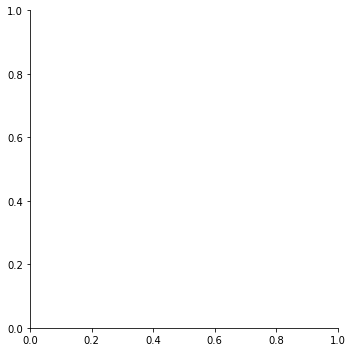

<Figure size 1080x720 with 0 Axes>

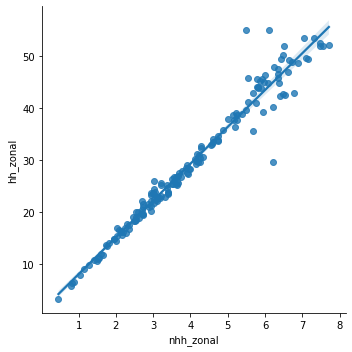

HH Zonal and residual


<Figure size 1080x720 with 0 Axes>

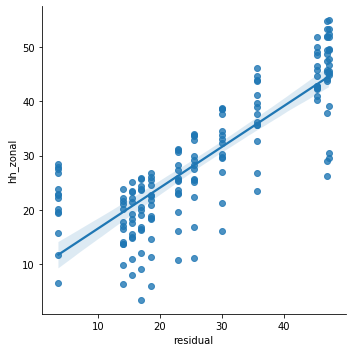

HH Zonal and year


<Figure size 1080x720 with 0 Axes>

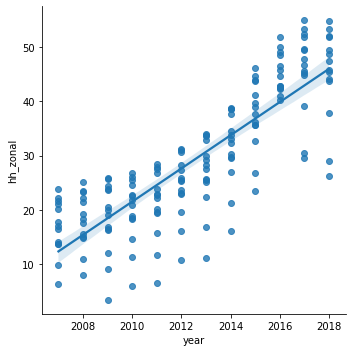

HH Zonal and log_nd


<Figure size 1080x720 with 0 Axes>

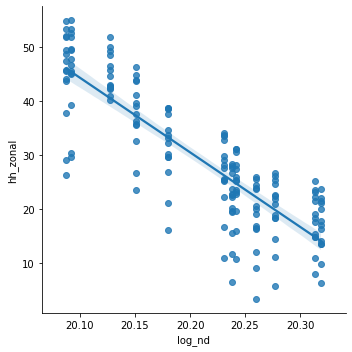

HH Zonal and inflation


<Figure size 1080x720 with 0 Axes>

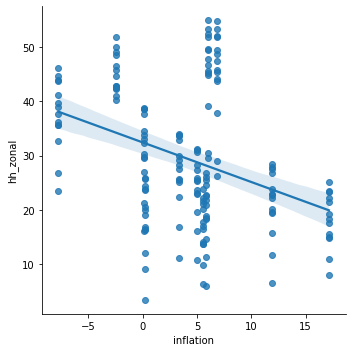

HH Zonal and operation_cost


<Figure size 1080x720 with 0 Axes>

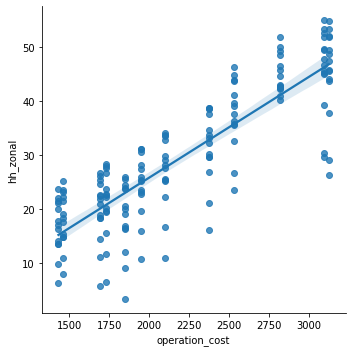

HH Zonal and amortization


<Figure size 1080x720 with 0 Axes>

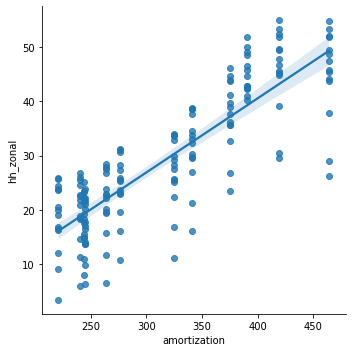

HH Zonal and operating_cost


<Figure size 1080x720 with 0 Axes>

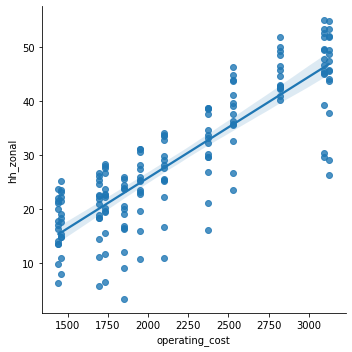

HH Zonal and revenue


<Figure size 1080x720 with 0 Axes>

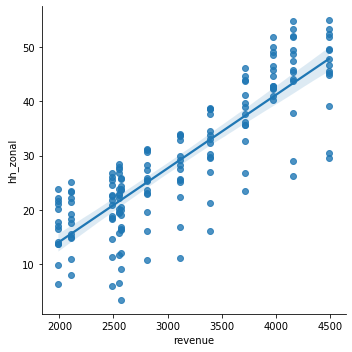

HH Zonal and total liabilities


<Figure size 1080x720 with 0 Axes>

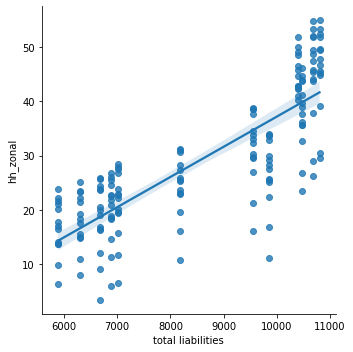

HH Zonal and net payroll costs


<Figure size 1080x720 with 0 Axes>

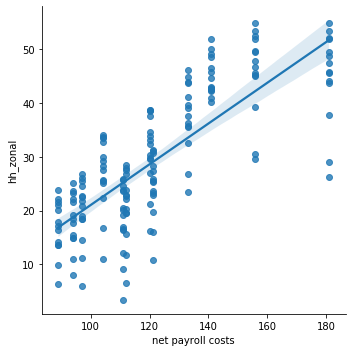

HH Zonal and number of employees


<Figure size 1080x720 with 0 Axes>

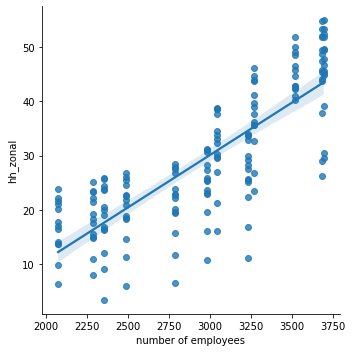

HH Zonal and tax


<Figure size 1080x720 with 0 Axes>

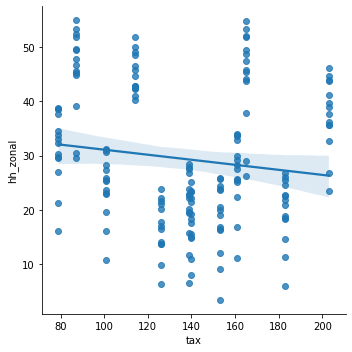

HH Zonal and adj_close


<Figure size 1080x720 with 0 Axes>

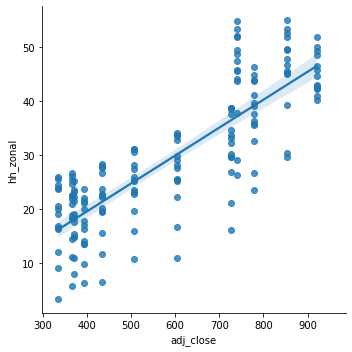

HH Zonal and volume


<Figure size 1080x720 with 0 Axes>

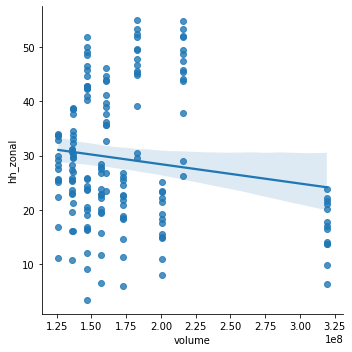

In [29]:
for i in df.columns:
    if i == "hh_zonal":
        continue
    else:
        try:
            print("HH Zonal and",i)
            plt.figure(figsize=(15,10))
            sns.lmplot(y="hh_zonal",x=i,data=df)
            plt.show()
        except:
            continue

### Plotting amortisation and hh zonal tariff

In [30]:
for i in zones:
    fig = px.scatter(x = "hh_zonal",y = "amortization",data_frame=df[df.zone_name==i],title="Relationship between Amortisation and HH Zonal Tariff in "+i,trendline="ols")
    
    fig.update_layout(
    xaxis_title="HH Zonal Tariff in ",
    yaxis_title="Amortisation",
    font=dict(
        size=12,
        color="#000000"
    ))
    results = px.get_trendline_results(fig)
    print(f'The Pearson correlation coefficiet is{df[df.zone_name==i]["hh_zonal"].corr(df[df.zone_name==i]["amortization"])}')
    fig.show()

The Pearson correlation coefficiet is0.8929008319069756


The Pearson correlation coefficiet is0.9469141744925167


The Pearson correlation coefficiet is0.9669018842659252


The Pearson correlation coefficiet is0.9704100456994728


The Pearson correlation coefficiet is0.9698302017040302


The Pearson correlation coefficiet is0.974291386655063


The Pearson correlation coefficiet is0.972112968610904


The Pearson correlation coefficiet is0.9755955468403276


The Pearson correlation coefficiet is0.967755763758232


The Pearson correlation coefficiet is0.9740943776947554


The Pearson correlation coefficiet is0.9717932460781283


The Pearson correlation coefficiet is0.9755021169398633


The Pearson correlation coefficiet is0.9790041873383469


The Pearson correlation coefficiet is0.8541235430184185


## Mean HH zonal tariff by zone

Text(0.5, 1.0, 'Mean HH Zonal tariff by zone')

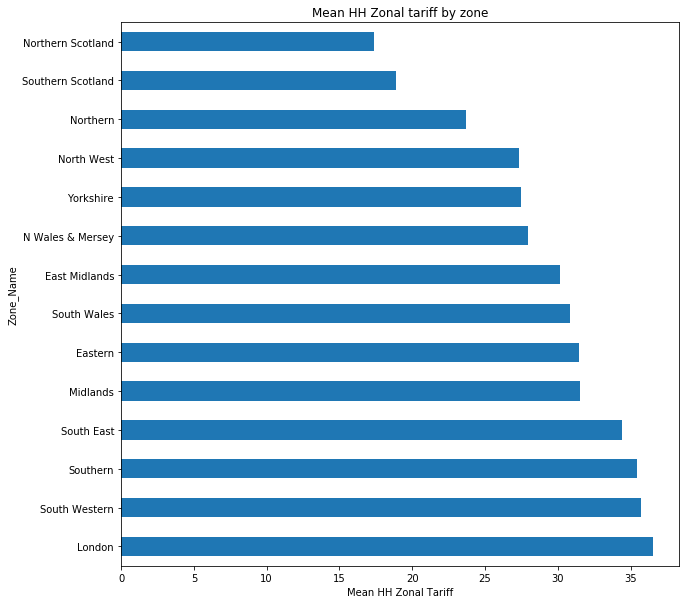

In [31]:
plt.figure(figsize=(10,10))
df.groupby("zone_name").mean()["hh_zonal"].nlargest(14).plot(kind="barh")
plt.xlabel("Mean HH Zonal Tariff")
plt.ylabel("Zone_Name")
plt.title("Mean HH Zonal tariff by zone")

## According to the HH Zonal Tariff, the most expensive zone is London and the least is Northern Scotland. I suppose that this zone will remain cheapest

## Mean HH zonal tariff by year

Text(0.5, 1.0, 'Mean HH Zonal tariff by year')

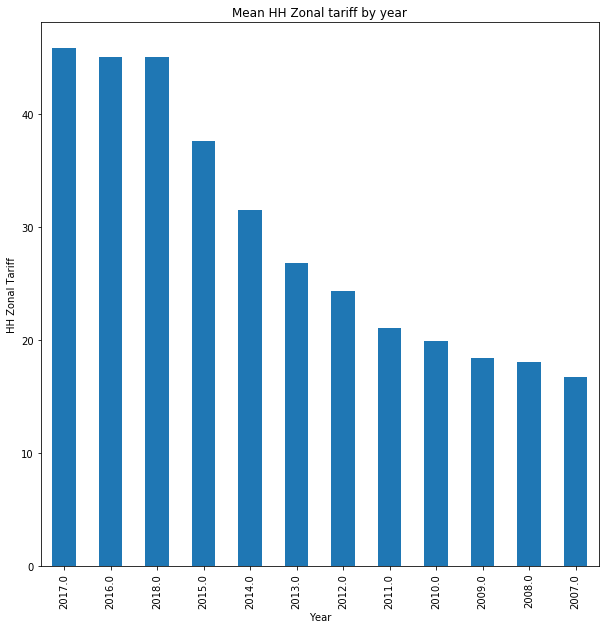

In [32]:
plt.figure(figsize=(10,10))
df.groupby(["year"]).mean()["hh_zonal"].nlargest(15).plot(kind="bar")
plt.ylabel("HH Zonal Tariff")
plt.xlabel("Year")
plt.title("Mean HH Zonal tariff by year")

### Until now the cheapest year was 2007(the first year) and the most expensive was 2017

## Correlation heatmap

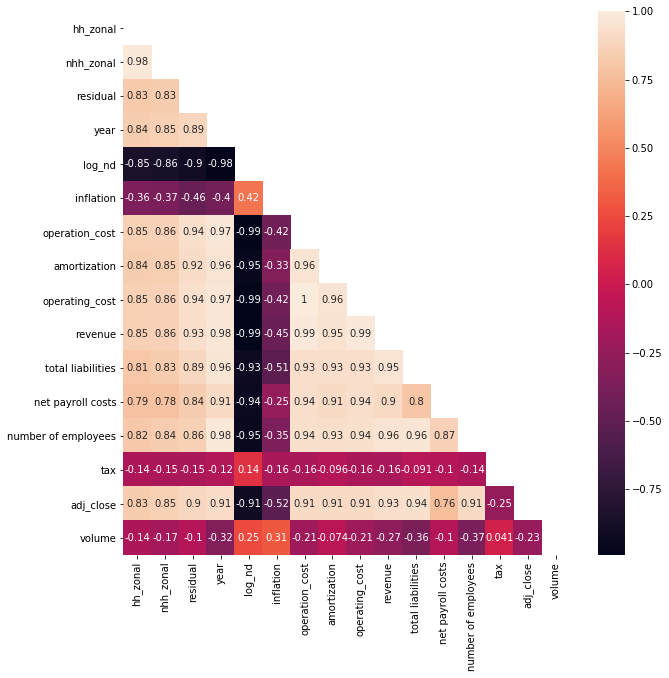

In [41]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,mask=mask)

## Not enough data but I will create Grangers causation matricies

df

In [245]:
df.corr()

hh_zonal  nhh_zonal  residual      year    log_nd  \
hh_zonal             1.000000   0.980198  0.827733  0.837251 -0.848076   
nhh_zonal            0.980198   1.000000  0.833532  0.852859 -0.857505   
residual             0.827733   0.833532  1.000000  0.890495 -0.896387   
year                 0.837251   0.852859  0.890495  1.000000 -0.979111   
log_nd              -0.848076  -0.857505 -0.896387 -0.979111  1.000000   
inflation           -0.359700  -0.372073 -0.456275 -0.399576  0.417911   
operation_cost       0.854077   0.860859  0.944400  0.971467 -0.989428   
amortization         0.842941   0.849420  0.917919  0.958299 -0.951450   
operating_cost       0.854231   0.860937  0.944809  0.970989 -0.989240   
revenue              0.852883   0.864309  0.932922  0.975553 -0.986445   
total liabilities    0.811258   0.829131  0.893410  0.963796 -0.925538   
net payroll costs    0.786047   0.783283  0.844511  0.908837 -0.939958   
number of employees  0.816086   0.836909  0.856844  0.983768 -0.946134   
tax                 -0.135853  -0.149261 -0.145165 -0.117117  0.140685   

                     inflation  operation_cost  amortization  operating_cost  \
hh_zonal             -0.359700        0.854077      0.842941        0.854231   
nhh_zonal            -0.372073        0.860859      0.849420        0.860937   
residual             -0.456275        0.944400      0.917919        0.944809   
year                 -0.399576        0.971467      0.958299        0.970989   
log_nd                0.417911       -0.989428     -0.951450       -0.989240   
inflation             1.000000       -0.421668     -0.329486       -0.422122   
operation_cost       -0.421668        1.000000      0.959966        0.999991   
amortization         -0.329486        0.959966      1.000000        0.960396   
operating_cost       -0.422122        0.999991      0.960396        1.000000   
revenue              -0.445813        0.991345      0.947556        0.991156   
total liabilities    -0.513920        0.932527      0.932794        0.932172   
net payroll costs    -0.245845        0.937325      0.907435        0.937273   
number of employees  -0.353363        0.939715      0.932430        0.939107   
tax                  -0.155474       -0.155456     -0.095952       -0.156169   

                      revenue  total liabilities  net payroll costs  \
hh_zonal             0.852883           0.811258           0.786047   
nhh_zonal            0.864309           0.829131           0.783283   
residual             0.932922           0.893410           0.844511   
year                 0.975553           0.963796           0.908837   
log_nd              -0.986445          -0.925538          -0.939958   
inflation           -0.445813          -0.513920          -0.245845   
operation_cost       0.991345           0.932527           0.937325   
amortization         0.947556           0.932794           0.907435   
operating_cost       0.991156           0.932172           0.937273   
revenue              1.000000           0.953400           0.899916   
total liabilities    0.953400           1.000000           0.801345   
net payroll costs    0.899916           0.801345           1.000000   
number of employees  0.955446           0.964545           0.865382   
tax                 -0.162736          -0.090597          -0.099598   

                     number of employees       tax  
hh_zonal                        0.816086 -0.135853  
nhh_zonal                       0.836909 -0.149261  
residual                        0.856844 -0.145165  
year                            0.983768 -0.117117  
log_nd                         -0.946134  0.140685  
inflation                      -0.353363 -0.155474  
operation_cost                  0.939715 -0.155456  
amortization                    0.932430 -0.095952  
operating_cost                  0.939107 -0.156169  
revenue                         0.955446 -0.162736  
total liabilities               0.964545 -0.090597  
net pay

In [85]:
df_d = pd.get_dummies(df)
df_d 

hh_zonal  nhh_zonal   residual    year     log_nd  inflation  \
2007-12-31   6.362303   0.830136  14.061505  2007.0  20.319042   5.588235   
2007-12-31   9.884146   1.287148  14.061505  2007.0  20.319042   5.588235   
2007-12-31  13.646168   1.734890  14.061505  2007.0  20.319042   5.588235   
2007-12-31  13.615270   1.750626  14.061505  2007.0  20.319042   5.588235   
2007-12-31  14.084355   1.805802  14.061505  2007.0  20.319042   5.588235   
...               ...        ...        ...     ...        ...        ...   
2018-12-31  54.906683   6.106170  46.933426  2018.0  20.087578   6.866538   
2018-12-31  53.419807   7.317489  46.933426  2018.0  20.087578   6.866538   
2018-12-31  51.867520   7.560093  46.933426  2018.0  20.087578   6.866538   
2019-12-31        NaN        NaN        NaN     NaN        NaN        NaN   
2020-12-31        NaN        NaN        NaN     NaN        NaN        NaN   

            operation_cost  amortization  revenue    year  ...  \
2007-12-31          1433.0         245.0   1991.0  2007.0  ...   
2007-12-31          1433.0         245.0   1991.0  2007.0  ...   
2007-12-31          1433.0         245.0   1991.0  2007.0  ...   
2007-12-31          1433.0         245.0   1991.0  2007.0  ...   
2007-12-31          1433.0         245.0   1991.0  2007.0  ...   
...                    ...           ...      ...     ...  ...   
2018-12-31          3125.0         464.0   4158.0  2018.0  ...   
2018-12-31          3125.0         464.0   4158.0  2018.0  ...   
2018-12-31          3125.0         464.0   4158.0  2018.0  ...   
2019-12-31             NaN           NaN      NaN     NaN  ...   
2020-12-31             NaN           NaN      NaN     NaN  ...   

            zone_name_N Wales & Mersey  zone_name_North West  \
2007-12-31                           0                     0   
2007-12-31                           0                     0   
2007-12-31                           0                     1   
2007-12-31                           0                     0   
2007-12-31                           1                     0   
...                                ...                   ...   
2018-12-31                           0                     0   
2018-12-31                           0                     0   
2018-12-31                           0                     0   
2019-12-31                           0                     0   
2020-12-31                           0                     0   

            zone_name_Northern  zone_name_Northern Scotland  \
2007-12-31                   0                            0   
2007-12-31                   1                            0   
2007-12-31                   0                            0   
2007-12-31                   0                            0   
2007-12-31                   0                            0   
...                        ...                          ...   
2018-12-31                   0                            0   
2018-12-31                   0                            0   
2018-12-31                   0                            0   
2019-12-31                   0                            0   
2020-12-31                   0                            0   

            zone_name_South East  zone_name_South Wales  \
2007-12-31                     0                      0   
2007-12-31                     0                      0   
2007-12-31                     0                      0   
2007-12-31                     0                      0   
2007-12-31                     0                      0   
...                          ...                    ...   
2018-12-31                     0                      0   
2018-12-31                     0                      0   
2018-12-31                     0                      0   
2019-12-31                     0                      0   
2020-12-31                     0                      0   

            zone_name_South Western  zone_name_Southern  \
2

In [25]:
df_df = df_d.dropna()

In [86]:
df_df.columns

Index(['hh_zonal', 'nhh_zonal', 'residual', 'year', 'log_nd', 'inflation',
       'operation_cost', 'amortization', 'revenue', 'adj_close', 'volume',
       'zone_name_East Midlands', 'zone_name_Eastern', 'zone_name_London',
       'zone_name_Midlands', 'zone_name_N Wales & Mersey',
       'zone_name_North West', 'zone_name_Northern',
       'zone_name_Northern Scotland', 'zone_name_South East',
       'zone_name_South Wales', 'zone_name_South Western',
       'zone_name_Southern', 'zone_name_Southern Scotland',
       'zone_name_Yorkshire'],
      dtype='object')

In [34]:
import operator
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
features_dict = {}
from sklearn.feature_selection import SelectKBest,SelectFromModel
def create_lasso_feat_plot(df,zone_name,var="hh_zonal",alpha=0.01):
    #creating vectors
    print('For',zone_name)

    
    temp = df[df.zone_name == zone_name]
    temp.drop(["zone_name",'year'],axis=1,inplace=True)
    X = temp.drop(var,axis=1)
    y = temp[[var]]
    #print(temp)
    lasso = Lasso()
    
    params = {"alpha":[1e-15,1e-10,1e-3,1e-2,1,5,10,20]}
    #print("PIN")
    lasso_reg = GridSearchCV(lasso,params,scoring="neg_mean_squared_error",cv=5)
    #print("PIN")
    lasso_reg.fit(X,y)
    
    sel_ = SelectFromModel(lasso_reg.best_estimator_)
    sel_.fit(X,y)
    
  
    
    
    
    
    
    coef_lasso = pd.Series(lasso_reg.best_estimator_.coef_,index = X.columns)
    print("LASSO coef:")
    print(coef_lasso)
    print('***************************************')
    selected_feat = X.columns[(sel_.get_support())]
    print('For',zone_name)
    print('total features: {}'.format((X.shape[1])))
    print('selected features: {}'.format(len(selected_feat)))
    print('features with coefficients shrank to zero: {}'.format(
          np.sum(sel_.estimator_.coef_ == 0))) 
    
    indicies = [i for i, x in enumerate(sel_.get_support()) if x]
    selected_features = operator.itemgetter(*indicies)(X.columns)
    print("\n")
    print("Selected features: ",selected_features)
    features_dict[zone_name] = selected_features
    print('***********************************************************')

In [35]:

### The sign of the coeff gives the sign of the correlation between the feature and the residual.
for i in zones:
    create_lasso_feat_plot(df,zone_name=i,var="hh_zonal")

For Southern Scotland
LASSO coef:
nhh_zonal              4.960654e+00
residual               5.494886e-02
log_nd                -3.411344e+00
inflation             -3.255211e-02
operation_cost        -3.848828e-03
amortization           1.184463e-02
operating_cost        -1.575090e-03
revenue                2.953609e-03
total liabilities     -2.783897e-04
net payroll costs      5.425740e-02
number of employees   -1.354677e-03
tax                    7.910556e-03
adj_close              7.310044e-03
volume                -6.527883e-09
dtype: float64
***************************************
For Southern Scotland
total features: 14
selected features: 13
features with coefficients shrank to zero: 0


Selected features:  ('nhh_zonal', 'residual', 'log_nd', 'inflation', 'operation_cost', 'amortization', 'operating_cost', 'revenue', 'total liabilities', 'net payroll costs', 'number of employees', 'tax', 'adj_close')
***********************************************************
For Northern
LASSO c

LASSO coef:
nhh_zonal              8.058797e-01
residual              -9.755659e-03
log_nd                -0.000000e+00
inflation              9.401649e-02
operation_cost         8.791974e-03
amortization           9.599527e-03
operating_cost        -1.259141e-03
revenue                3.985999e-03
total liabilities     -1.248106e-03
net payroll costs      1.478749e-02
number of employees    2.496313e-05
tax                    2.719093e-02
adj_close              2.328195e-02
volume                -3.616791e-10
dtype: float64
***************************************
For South East
total features: 14
selected features: 12
features with coefficients shrank to zero: 1


Selected features:  ('nhh_zonal', 'residual', 'inflation', 'operation_cost', 'amortization', 'operating_cost', 'revenue', 'total liabilities', 'net payroll costs', 'number of employees', 'tax', 'adj_close')
***********************************************************
For London
LASSO coef:
nhh_zonal              0.000000e+00


In [36]:
features_dict

{'Southern Scotland': ('nhh_zonal',
  'residual',
  'log_nd',
  'inflation',
  'operation_cost',
  'amortization',
  'operating_cost',
  'revenue',
  'total liabilities',
  'net payroll costs',
  'number of employees',
  'tax',
  'adj_close'),
 'Northern': ('nhh_zonal',
  'residual',
  'log_nd',
  'inflation',
  'operation_cost',
  'amortization',
  'operating_cost',
  'revenue',
  'total liabilities',
  'net payroll costs',
  'number of employees',
  'tax',
  'adj_close'),
 'North West': ('operation_cost',
  'operating_cost',
  'revenue',
  'total liabilities',
  'number of employees',
  'tax',
  'adj_close'),
 'Yorkshire': ('residual',
  'operation_cost',
  'amortization',
  'revenue',
  'total liabilities',
  'number of employees',
  'tax',
  'adj_close'),
 'N Wales & Mersey': ('nhh_zonal',
  'residual',
  'inflation',
  'operation_cost',
  'amortization',
  'operating_cost',
  'revenue',
  'total liabilities',
  'net payroll costs',
  'number of employees',
  'tax',
  'adj_close'),

In [39]:
from sklearn.ensemble import ExtraTreesRegressor
def plot_feat_imp_tree(zone,n_estimators=10):
    temp = df[df.zone_name == zone]
    X = temp.drop(["zone_name","year","hh_zonal"],axis=1)
    y = temp[["hh_zonal"]]
    reg = ExtraTreesRegressor(n_estimators=n_estimators,bootstrap=True,random_state=42,max_features="auto")
    reg = reg.fit(X, y)
    plt.figure(figsize=(10,10))
    pd.Series(reg.feature_importances_,index=X.columns).nlargest(10).plot(kind="bar")
    plt.show()

Southern Scotland


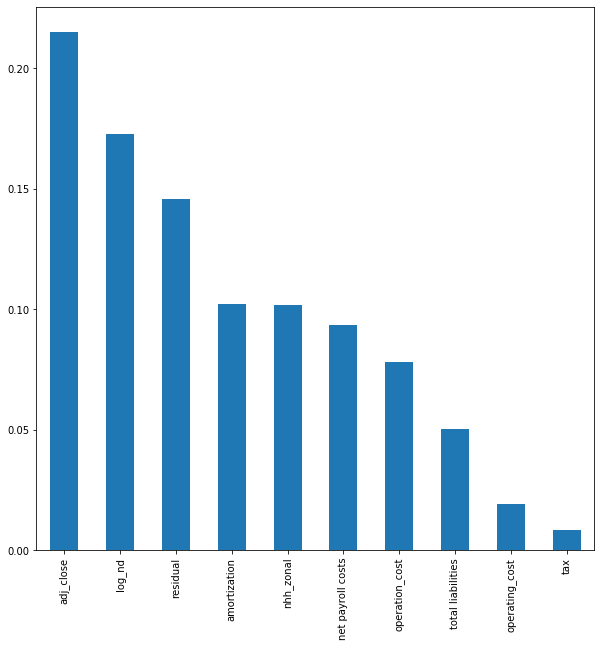

Northern


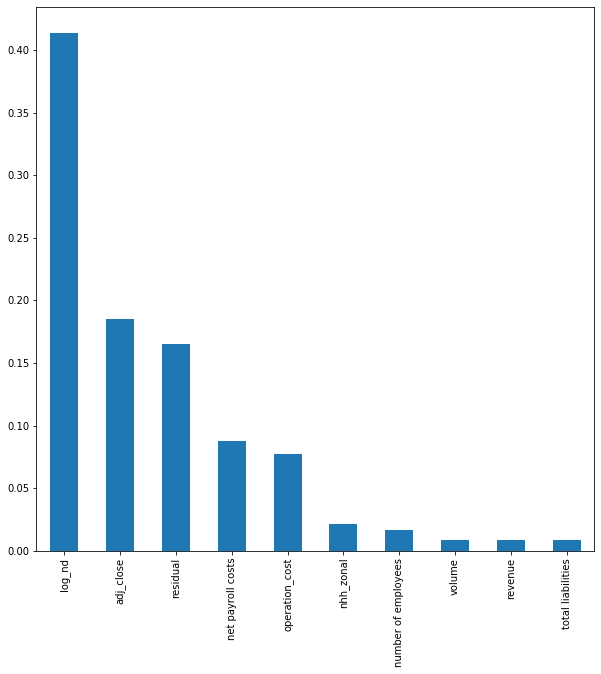

North West


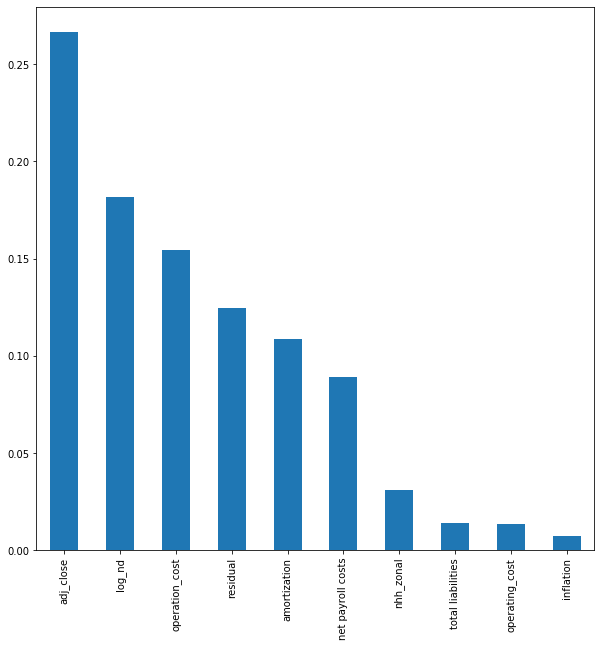

Yorkshire


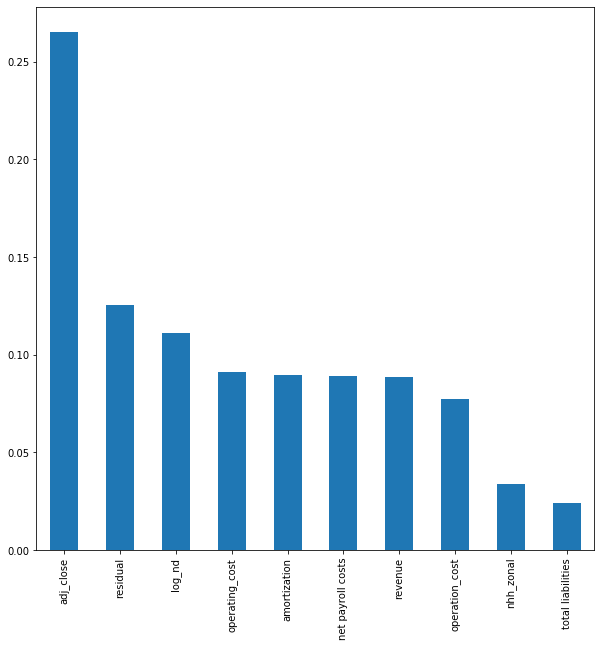

N Wales & Mersey


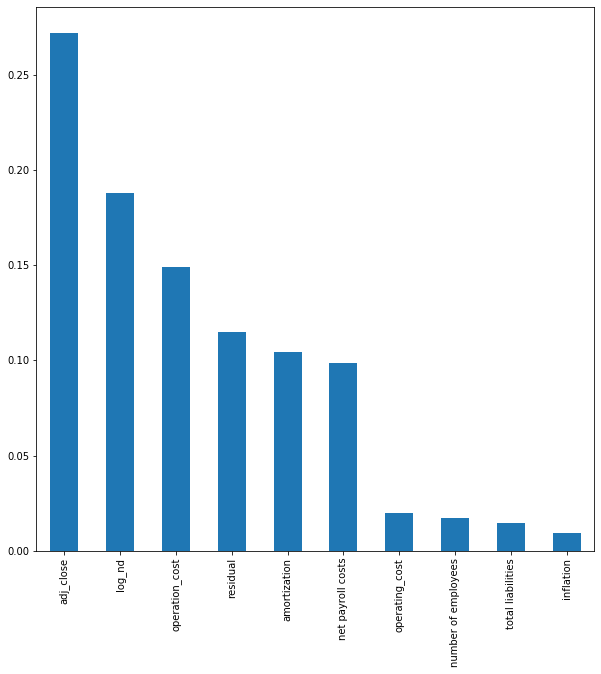

East Midlands


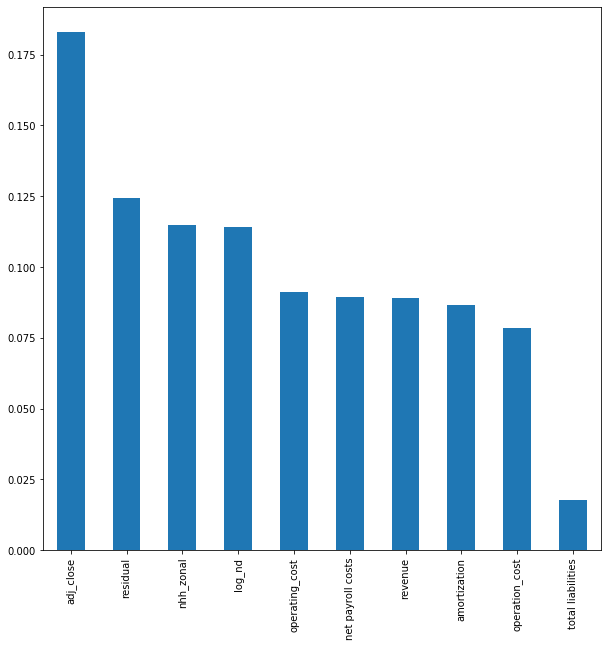

Midlands


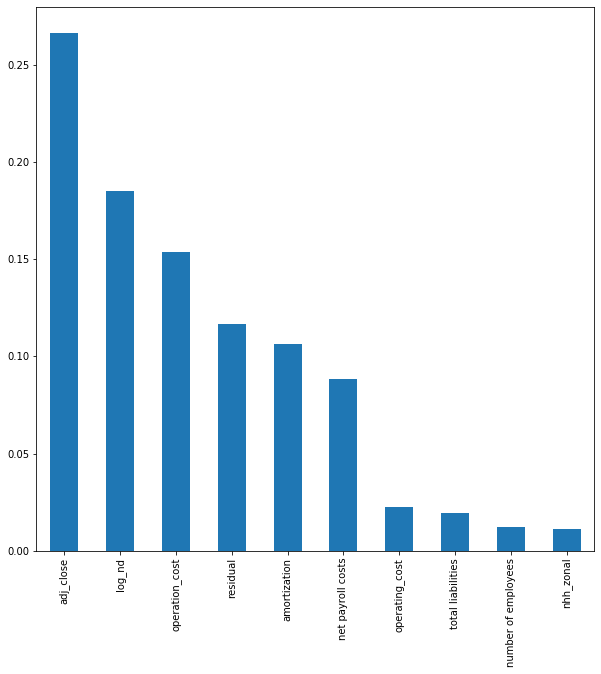

Eastern


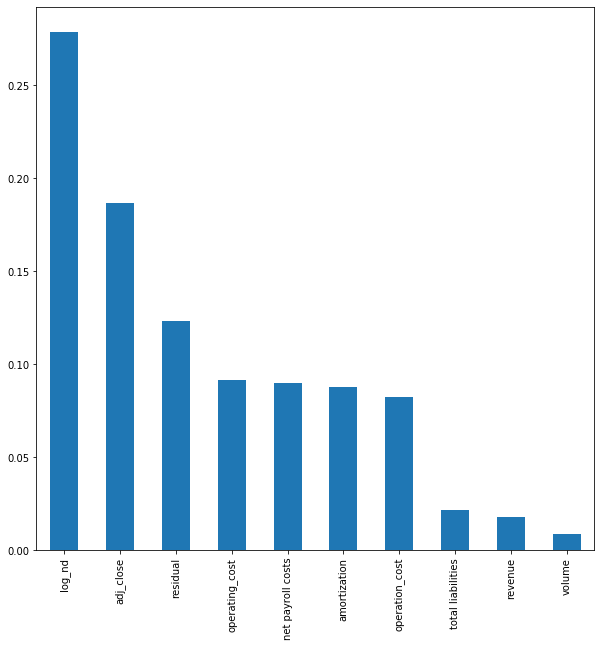

South Wales


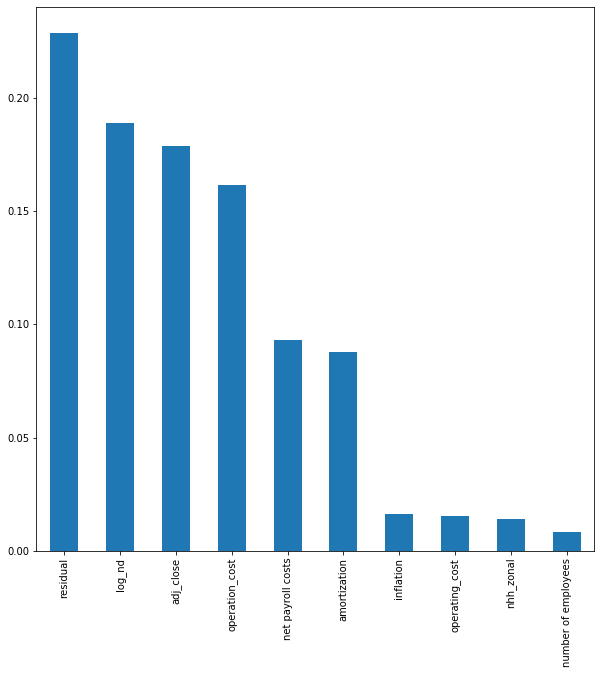

South East


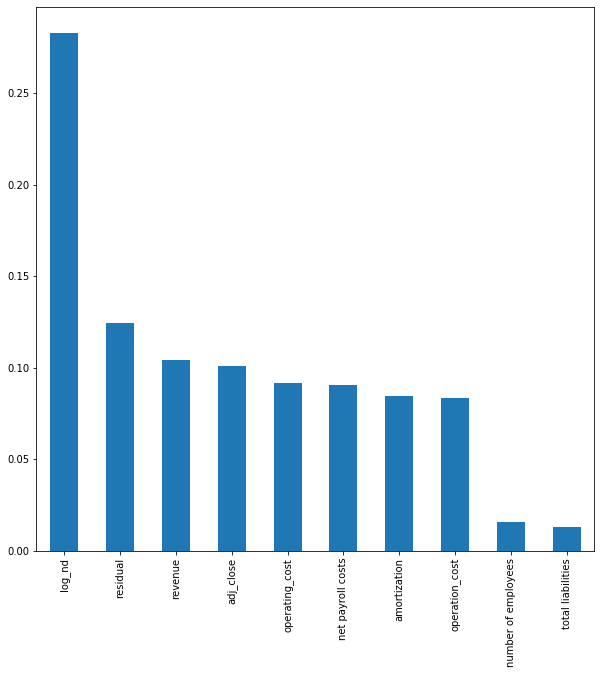

London


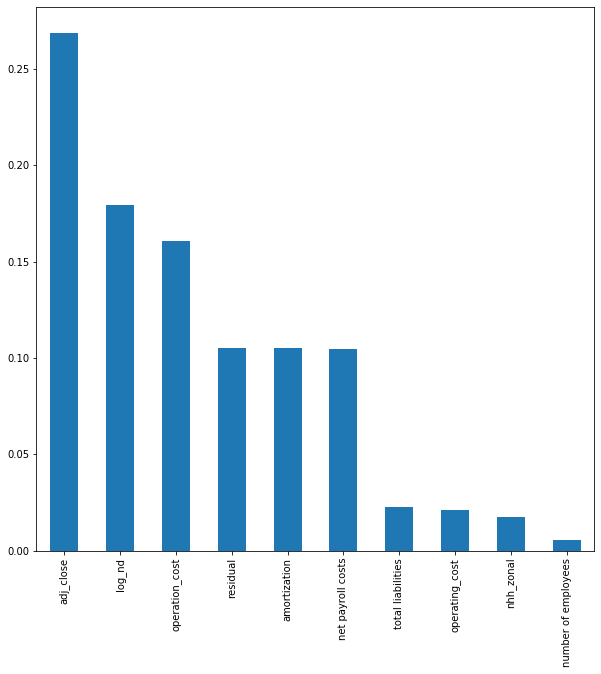

Southern


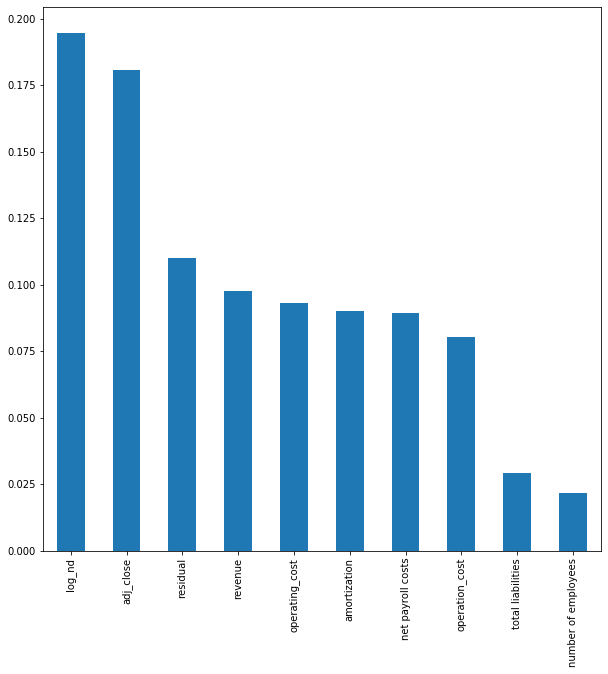

South Western


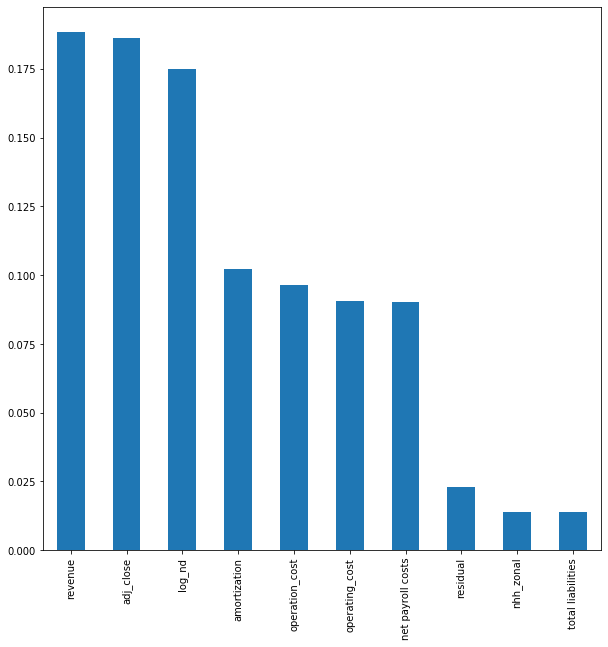

Northern Scotland


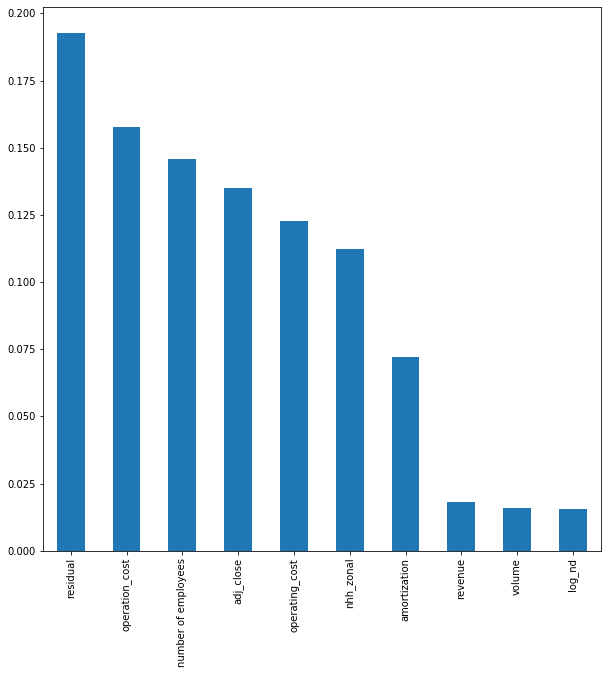

In [40]:
for i in zones:
    print(i)
    plot_feat_imp_tree(i)

In [362]:
df[df.zone_name==zones[2]]


zone_name   hh_zonal  nhh_zonal   residual  year     log_nd  \
SETTLEMENT_DATE                                                                 
2007-12-31       North West  13.646168   1.734890  14.061505  2007  20.319042   
2008-12-31       North West  14.911638   1.956780  15.403402  2008  20.313523   
2009-12-31       North West  16.542926   2.095188  16.943694  2009  20.260050   
2010-12-31       North West  18.426326   2.552189  18.558560  2010  20.277094   
2011-12-31       North West  19.449161   2.736856   3.607933  2011  20.238285   
2012-12-31       North West  22.838742   3.310579  22.828373  2012  20.241926   
2013-12-31       North West  25.184470   3.651462  25.408454  2013  20.230591   
2014-12-31       North West  29.640148   4.243585  30.052442  2014  20.180207   
2015-12-31       North West  35.683316   4.874799  35.634955  2015  20.151214   
2016-12-31       North West  42.828015   5.688026  45.333826  2016  20.127212   
2017-12-31       North West  45.245665   5.878185  47.260756  2017  20.091862   
2018-12-31       North West  43.806241   5.881985  46.933426  2018  20.087578   

                 inflation  operation_cost  amortization  operating_cost  \
SETTLEMENT_DATE                                                            
2007-12-31        5.588235            1433           245            1443   
2008-12-31       17.130920            1461           244            1461   
2009-12-31        0.237812            1848           221            1848   
2010-12-31        5.812574            1693           240            1693   
2011-12-31       11.883410            1730           264            1730   
2012-12-31        5.010020            1948           276            1948   
2013-12-31        3.339695            2102           325            2102   
2014-12-31        0.092336            2375           341            2375   
2015-12-31       -7.749077            2529           375            2529   
2016-12-31       -2.500000            2818           390            2818   
2017-12-31        6.051282            3093           419            3093   
2018-12-31        6.866538            3125           464            3125   

                 revenue  total liabilities  net payroll costs  \
SETTLEMENT_DATE                                                  
2007-12-31          1991               5887                 89   
2008-12-31          2106               6299                 94   
2009-12-31          2566               6681                111   
2010-12-31          2484               6885                 97   
2011-12-31          2549               7022                112   
2012-12-31          2813               8178                121   
2013-12-31          3111               9854                104   
2014-12-31          3393               9559                120   
2015-12-31          3713              10467                133   
2016-12-31          3979              10405                141   
2017-12-31          4493              10801                156   
2018-12-31          4158              10682                181   

                 number of employees  tax  
SETTLEMENT_DATE                            
2007-12-31                      2073  126  
2008-12-31                      2288  140  
2009-12-31                      2352  153  
2010-12-31                      2488  183  
2011-12-31                      2784  139  
2012-12-31                      2978  101  
2013-12-31                      3229  161  
2014-12-31                      3044   79  
2015-12-31                      3270  203  
2016-12-31                      3520  114  
2017-12-31                      3692   87  
2018-12-31                      3679  165

In [361]:
df[df.zone_name==zones[2]].shape

(12, 15)

## Ridge feature coeff(Regularization)

In [155]:
from sklearn.linear_model import Ridge
def create_ridge_feat_plot(df,zone_name,var="hh_zonal",alpha=0.01):
    #creating vectors
    temp = df[df.zone_name == zone_name]
    temp.drop(["zone_name",'year'],axis=1,inplace=True)
#    print(temp)
    X = temp.drop(var,axis=1)
    y = temp[[var]]
    #print(temp)
    ridge = Ridge(alpha=alpha)
    print(ridge)
    #print("PIN")
    
    ridge.fit(X,y)
    print(X.columns)
    pd.Series(ridge.coef_,index=X.columns).plot()    
    print("dssdaad")
 #   plt.figure(figsize=(10,10))
#    coef_ridge.nlargest(20).plot(kind="bar")
#    plt.title(zone_name)

In [156]:
for i in zones:
    create_ridge_feat_plot(df,zone_name=i,var="hh_zonal")

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Index(['nhh_zonal', 'residual', 'log_nd', 'inflation', 'operation_cost',
       'amortization', 'revenue', 'page', 'operating_cost',
       'total liabilities', 'net payroll costs', 'number of employees', 'tax',
       'adj_close', 'volume'],
      dtype='object')


ValueError: Length of passed values is 1, index implies 15.

In [157]:
ridge.coef_

array([ 2.11019877e+00,  8.89169744e-02,  2.51915846e-01, -1.79824872e+01,
        1.31303187e-02,  1.98683408e-03,  1.09614364e-02,  1.39734670e-03,
        6.87410782e-03,  5.69693653e-09,  6.76195911e-01,  1.36594017e+00,
        5.67724143e+00,  1.44620816e+00, -1.08810314e+00, -1.16585551e+00,
       -3.74039748e+00, -9.75052960e+00,  3.31779391e+00,  1.32706379e+00,
        4.24686749e+00,  4.18509948e+00, -6.81998932e+00, -1.19709836e+00])

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X = df_df.drop("hh_zonal",axis=1)
y = df_df.hh_zonal

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state=42 )

In [29]:
from sklearn.linear_model import RidgeCV

In [30]:
ridge = RidgeCV(cv = 5, normalize = True)

In [31]:
ridge.fit(X,y)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5, fit_intercept=True,
        gcv_mode=None, normalize=True, scoring=None, store_cv_values=False)

In [32]:
coef_ridge = pd.Series(ridge.coef_,index = X.columns)
coef_ridge

nhh_zonal                      2.110199e+00
residual                       8.891697e-02
year                           2.519158e-01
log_nd                        -1.798249e+01
inflation                      1.313032e-02
operation_cost                 1.986834e-03
amortization                   1.096144e-02
revenue                        1.397347e-03
adj_close                      6.874108e-03
volume                         5.696937e-09
zone_name_East Midlands        6.761959e-01
zone_name_Eastern              1.365940e+00
zone_name_London               5.677241e+00
zone_name_Midlands             1.446208e+00
zone_name_N Wales & Mersey    -1.088103e+00
zone_name_North West          -1.165856e+00
zone_name_Northern            -3.740397e+00
zone_name_Northern Scotland   -9.750530e+00
zone_name_South East           3.317794e+00
zone_name_South Wales          1.327064e+00
zone_name_South Western        4.246867e+00
zone_name_Southern             4.185099e+00
zone_name_Southern Scotland   -6

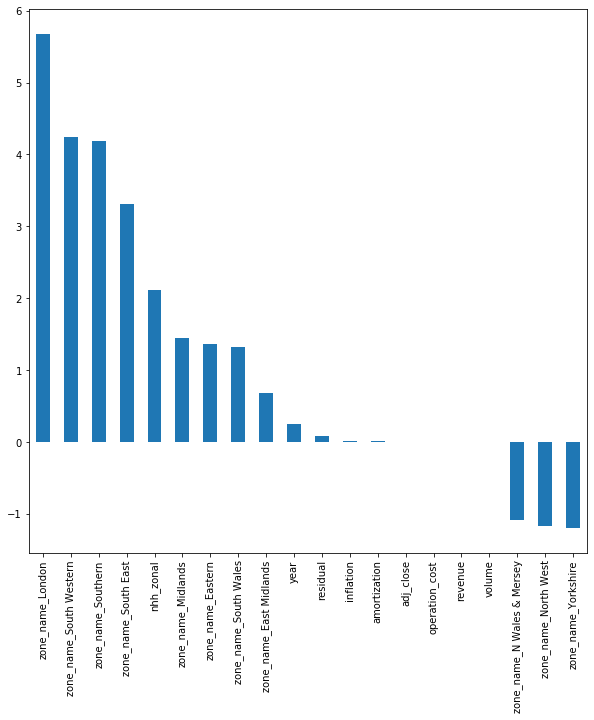

In [33]:
plt.figure(figsize=(10,10))
coef_ridge.nlargest(20).plot(kind="bar")

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(alpha=0.01)

In [ ]:
lasso.fit(X,y)

In [ ]:
plt.figure(figsize=(10,10))
pd.Series(lasso.coef_,index=X.columns).nlargest(20).plot(kind="barh")

In [ ]:
from sklearn.ensemble import RandomForestRegressor

### Random Forest Feature Importance

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
def feat_importance_plot_by_zone(df,zone_name,var="hh_zonal"):
    #creating vectors
    temp = df[df.zone_name == zone_name]
    temp.drop(["zone_name","year"],axis=1,inplace=True)
    X = temp.drop(var,axis=1)
    y = temp[[var]]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)
    rf = RandomForestRegressor(n_estimators=100,max_features="log2",criterion="mse")
 
    rf.fit(X,y)
    
    
    plt.figure(figsize=(10,10))
    pd.Series(rf.feature_importances_,index=X.columns).nlargest(20).plot(kind="bar")
    plt.title(zone_name)
    plt.show()
    

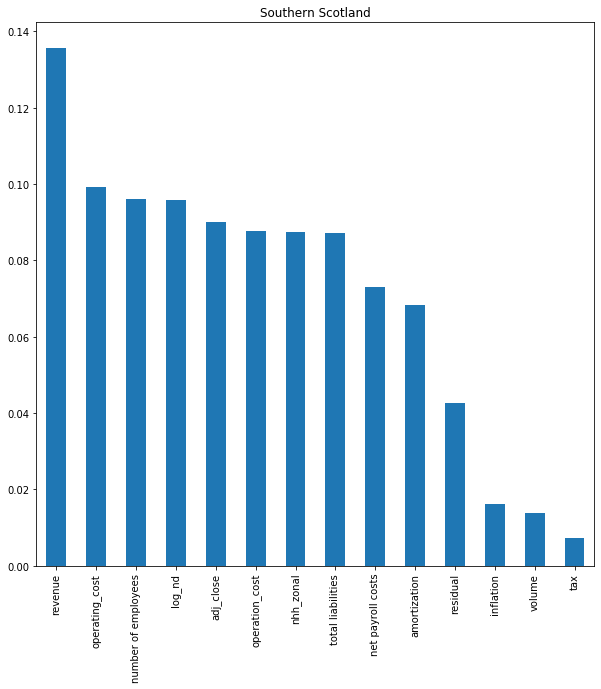

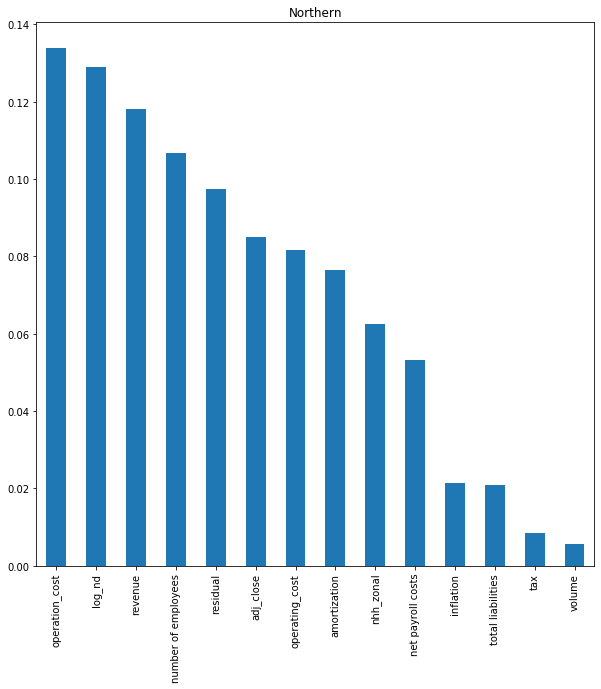

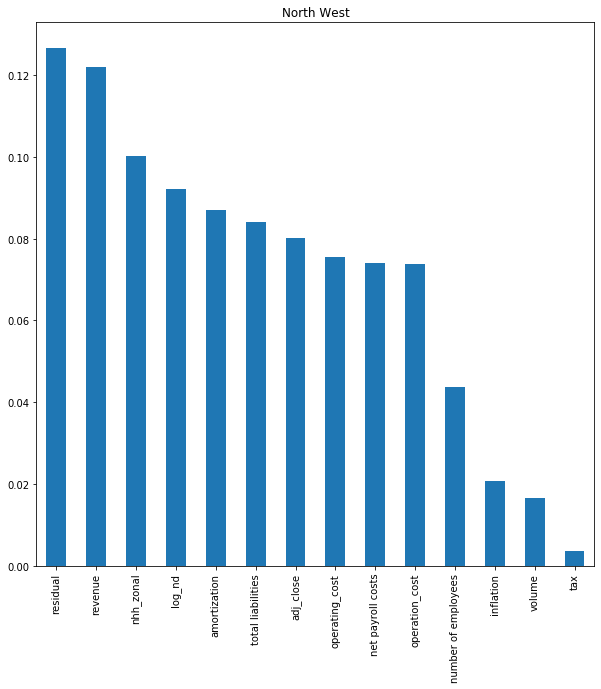

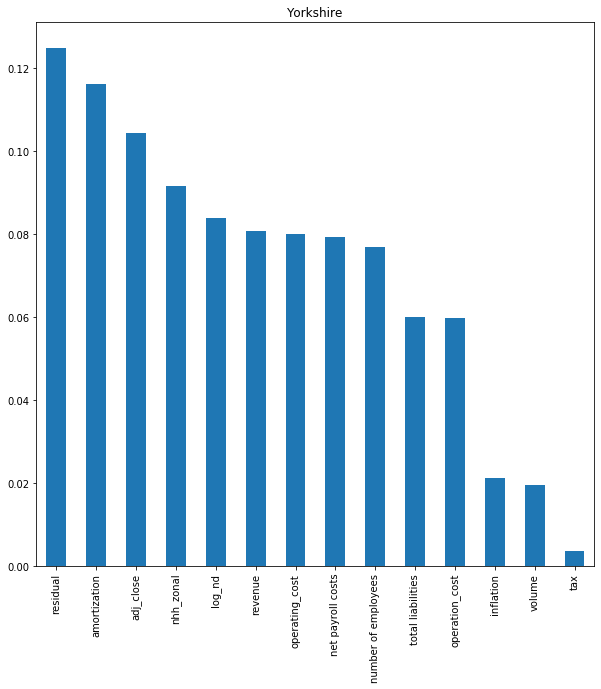

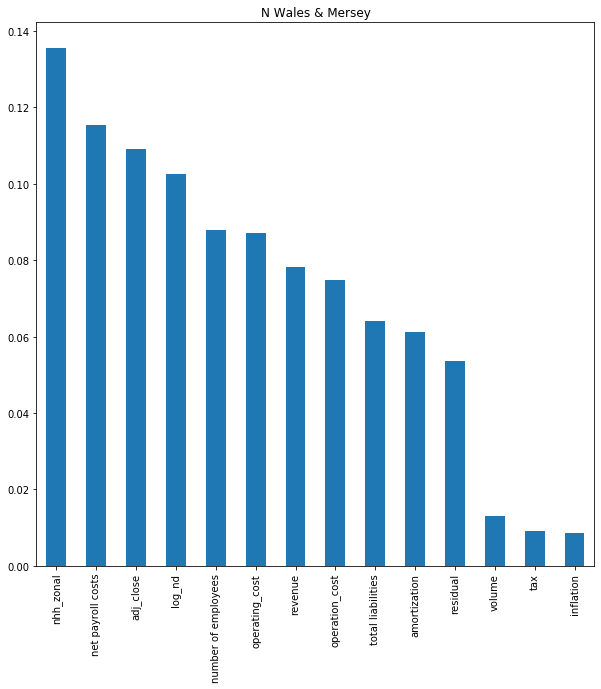

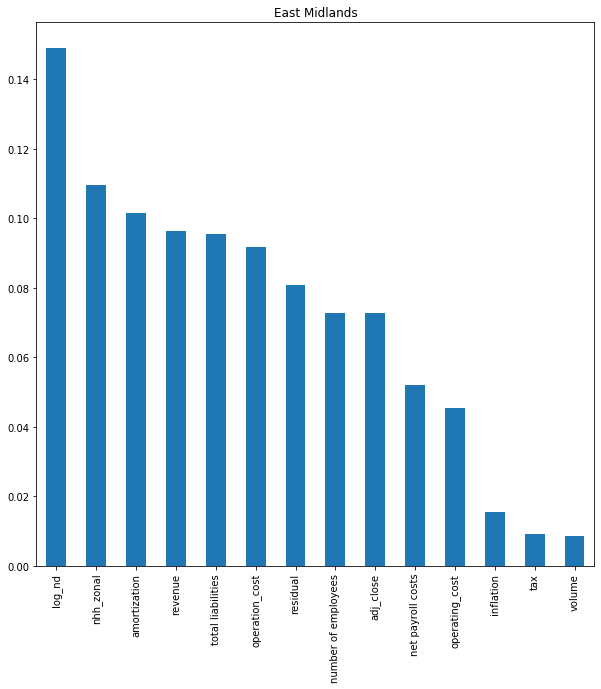

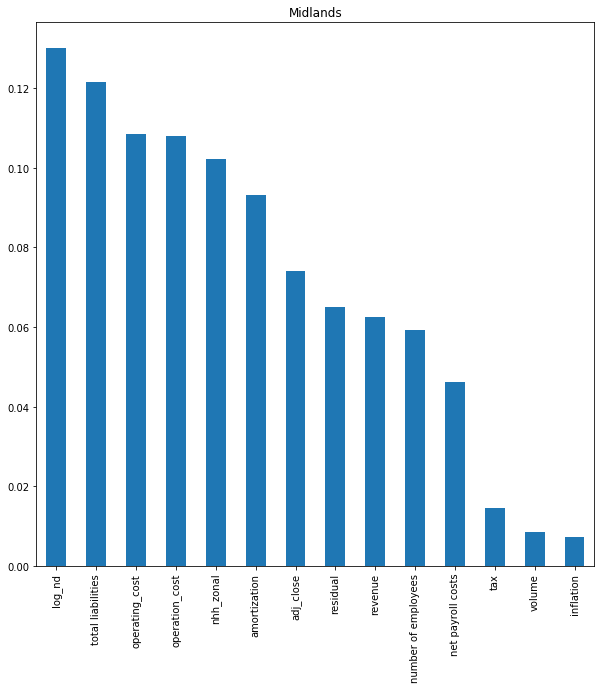

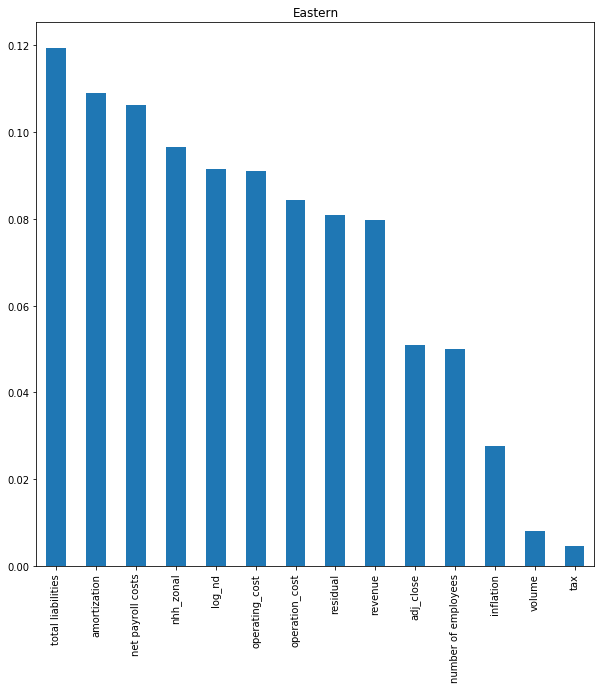

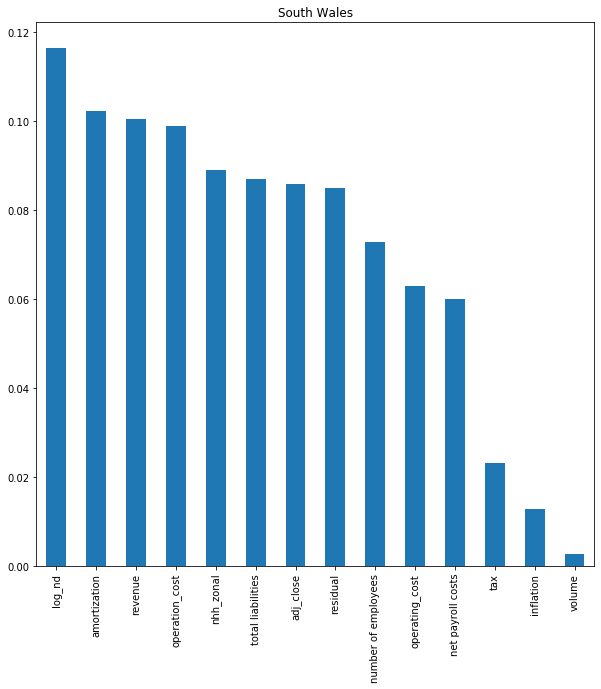

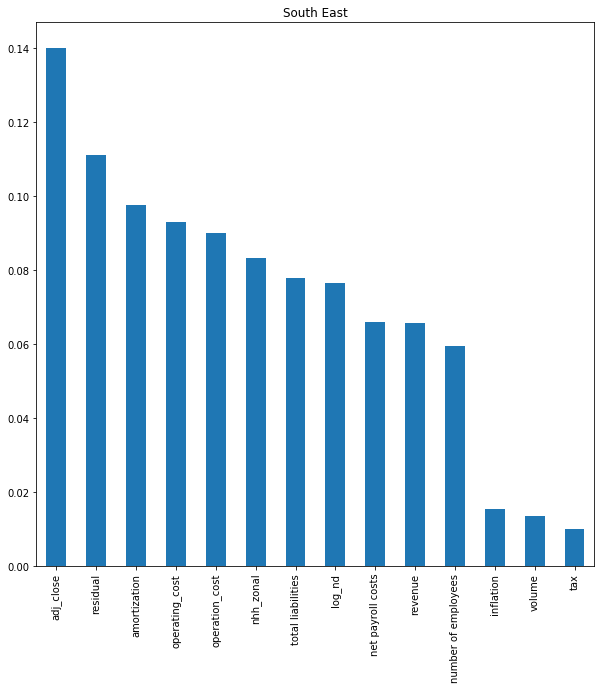

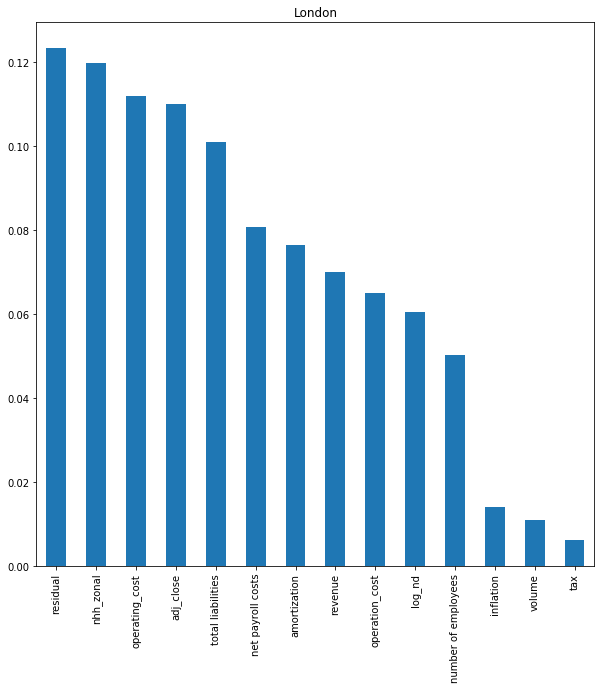

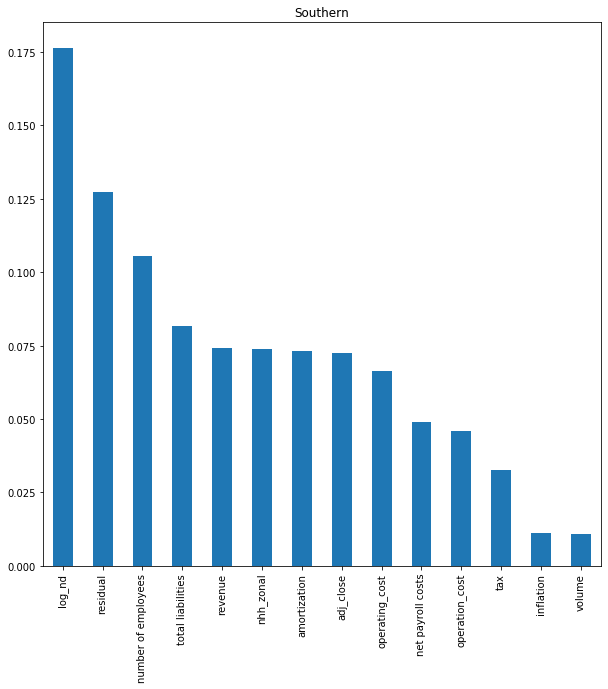

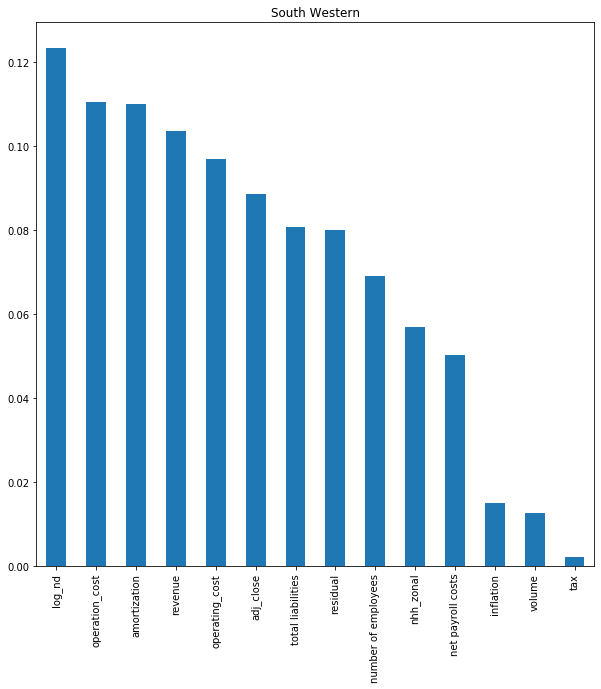

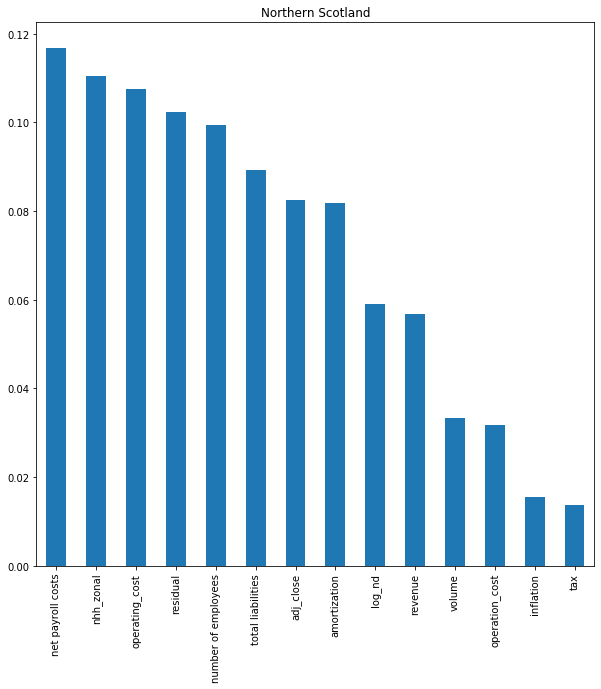

In [71]:
for i in zones:
    feat_importance_plot_by_zone(zone_name=i,df=df)

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
tree = DecisionTreeRegressor()

In [57]:
tree.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

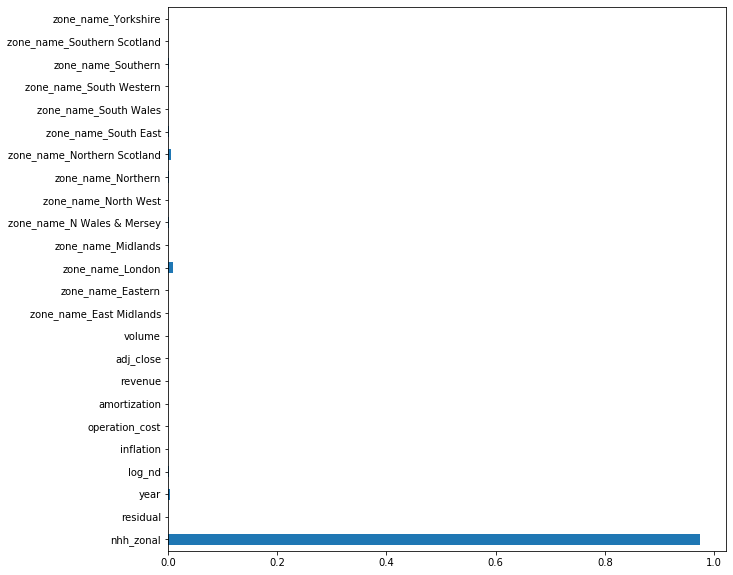

In [60]:
plt.figure(figsize=(10,10))
pd.Series(tree.feature_importances_,index=X.columns).plot(kind="barh")

### At maxlag =2, this is the causation_matrix

In [76]:
grangers_matricies={}
for zone in zones:
    temp = df[df.zone_name == zone]
#    temp.set_index("settlement_date",inplace = True)

    temp.drop(["zone_name","year"],axis=1,inplace=True)
    
    print("ZONE:",zone)
    grangers_df = ts.grangers_causation_matrix(temp,temp.columns,maxlag=2)
    p_values = (grangers_df[grangers_df.index == "hh_zonal_y"])
    grangers_matricies[zone] = p_values
    display(p_values.T)
    print("_______________________________________")
    print("\n")

ZONE: Southern Scotland


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.0000
residual_x                 0.8533
log_nd_x                   0.0034
inflation_x                0.0249
operation_cost_x           0.0163
amortization_x             0.0009
operating_cost_x           0.0153
revenue_x                  0.0015
total liabilities_x        0.0020
net payroll costs_x        0.4876
number of employees_x      0.1593
tax_x                      0.0120
adj_close_x                0.0047
volume_x                   0.3618

_______________________________________


ZONE: Northern


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.0000
residual_x                 0.4917
log_nd_x                   0.0824
inflation_x                0.0479
operation_cost_x           0.3209
amortization_x             0.0039
operating_cost_x           0.3193
revenue_x                  0.0418
total liabilities_x        0.0013
net payroll costs_x        0.8049
number of employees_x      0.2454
tax_x                      0.0162
adj_close_x                0.0435
volume_x                   0.2644

_______________________________________


ZONE: North West


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.0000
residual_x                 0.2046
log_nd_x                   0.1406
inflation_x                0.0208
operation_cost_x           0.5993
amortization_x             0.0001
operating_cost_x           0.6006
revenue_x                  0.1055
total liabilities_x        0.0002
net payroll costs_x        0.3696
number of employees_x      0.1060
tax_x                      0.2252
adj_close_x                0.0024
volume_x                   0.1538

_______________________________________


ZONE: Yorkshire


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.0094
residual_x                 0.0720
log_nd_x                   0.2151
inflation_x                0.0360
operation_cost_x           0.8446
amortization_x             0.0009
operating_cost_x           0.8265
revenue_x                  0.3224
total liabilities_x        0.0001
net payroll costs_x        0.2268
number of employees_x      0.0925
tax_x                      0.2897
adj_close_x                0.0097
volume_x                   0.1007

_______________________________________


ZONE: N Wales & Mersey


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.0006
residual_x                 0.1875
log_nd_x                   0.0989
inflation_x                0.0086
operation_cost_x           0.5099
amortization_x             0.0006
operating_cost_x           0.5134
revenue_x                  0.0761
total liabilities_x        0.0000
net payroll costs_x        0.2172
number of employees_x      0.0822
tax_x                      0.2098
adj_close_x                0.0002
volume_x                   0.1769

_______________________________________


ZONE: East Midlands


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.0116
residual_x                 0.0232
log_nd_x                   0.3569
inflation_x                0.0448
operation_cost_x           0.7916
amortization_x             0.0014
operating_cost_x           0.7728
revenue_x                  0.5130
total liabilities_x        0.0001
net payroll costs_x        0.2502
number of employees_x      0.0280
tax_x                      0.4188
adj_close_x                0.0029
volume_x                   0.0816

_______________________________________


ZONE: Midlands


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.0010
residual_x                 0.1217
log_nd_x                   0.1777
inflation_x                0.0201
operation_cost_x           0.7664
amortization_x             0.0046
operating_cost_x           0.7794
revenue_x                  0.3458
total liabilities_x        0.0000
net payroll costs_x        0.1664
number of employees_x      0.1175
tax_x                      0.2879
adj_close_x                0.0008
volume_x                   0.1268

_______________________________________


ZONE: Eastern


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.0001
residual_x                 0.0047
log_nd_x                   0.0765
inflation_x                0.0853
operation_cost_x           0.7261
amortization_x             0.0921
operating_cost_x           0.7064
revenue_x                  0.8088
total liabilities_x        0.0003
net payroll costs_x        0.2924
number of employees_x      0.0137
tax_x                      0.1589
adj_close_x                0.0037
volume_x                   0.0666

_______________________________________


ZONE: South Wales


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.1290
residual_x                 0.3385
log_nd_x                   0.0091
inflation_x                0.0430
operation_cost_x           0.0000
amortization_x             0.0000
operating_cost_x           0.0000
revenue_x                  0.0000
total liabilities_x        0.0000
net payroll costs_x        0.0491
number of employees_x      0.0017
tax_x                      0.5904
adj_close_x                0.0000
volume_x                   0.0060

_______________________________________


ZONE: South East


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.3223
residual_x                 0.0019
log_nd_x                   0.0108
inflation_x                0.0848
operation_cost_x           0.5898
amortization_x             0.1001
operating_cost_x           0.5718
revenue_x                  0.2500
total liabilities_x        0.0001
net payroll costs_x        0.1846
number of employees_x      0.0831
tax_x                      0.5871
adj_close_x                0.0009
volume_x                   0.1273

_______________________________________


ZONE: London


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.0000
residual_x                 0.5954
log_nd_x                   0.4150
inflation_x                0.1862
operation_cost_x           0.5542
amortization_x             0.0004
operating_cost_x           0.5472
revenue_x                  0.0757
total liabilities_x        0.0000
net payroll costs_x        0.1221
number of employees_x      0.0044
tax_x                      0.3926
adj_close_x                0.0000
volume_x                   0.1743

_______________________________________


ZONE: Southern


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.0008
residual_x                 0.4576
log_nd_x                   0.3096
inflation_x                0.0436
operation_cost_x           0.0347
amortization_x             0.0000
operating_cost_x           0.0348
revenue_x                  0.0524
total liabilities_x        0.0001
net payroll costs_x        0.0002
number of employees_x      0.0720
tax_x                      0.4662
adj_close_x                0.0034
volume_x                   0.0708

_______________________________________


ZONE: South Western


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.4674
residual_x                 0.6112
log_nd_x                   0.2369
inflation_x                0.0351
operation_cost_x           0.0170
amortization_x             0.0210
operating_cost_x           0.0180
revenue_x                  0.0037
total liabilities_x        0.0000
net payroll costs_x        0.0000
number of employees_x      0.0456
tax_x                      0.3390
adj_close_x                0.0001
volume_x                   0.0023

_______________________________________


ZONE: Northern Scotland


hh_zonal_y
hh_zonal_x                 1.0000
nhh_zonal_x                0.0000
residual_x                 0.3133
log_nd_x                   0.0000
inflation_x                0.0000
operation_cost_x           0.0035
amortization_x             0.0003
operating_cost_x           0.0035
revenue_x                  0.0002
total liabilities_x        0.0160
net payroll costs_x        0.6731
number of employees_x      0.3679
tax_x                      0.0050
adj_close_x                0.0000
volume_x                   0.1178

_______________________________________




In [110]:
from fbprophet import Prophet

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


ZONE: Southern Scotland




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  34.948353   27.390263   42.314274
1 2020-12-31  41.306529   33.745483   48.551936
2 2021-12-31  42.355958   35.041251   49.211762
3 2022-12-31  43.853530   36.783381   50.921028
4 2023-12-31  45.800721   38.604500   53.411663
5 2024-12-31  52.158897   45.138757   59.409122
6 2025-12-31  53.208326   46.527146   60.047198
7 2026-12-31  54.705898   47.529204   62.256057
8 2027-12-31  56.653088   49.287287   63.591231
9 2028-12-31  63.011265   55.838392   69.686182

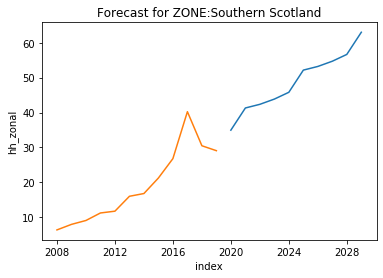

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


ZONE: Northern




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  43.525286   37.569713   49.763262
1 2020-12-31  48.818882   42.824841   54.639768
2 2021-12-31  50.768330   44.238997   56.787340
3 2022-12-31  53.232054   46.977924   59.129931
4 2023-12-31  56.210923   50.234157   62.426196
5 2024-12-31  61.504519   55.475549   66.989486
6 2025-12-31  63.453968   57.410919   69.261621
7 2026-12-31  65.917691   59.259153   72.277598
8 2027-12-31  68.896561   63.280088   74.591144
9 2028-12-31  74.190156   68.252552   79.836493

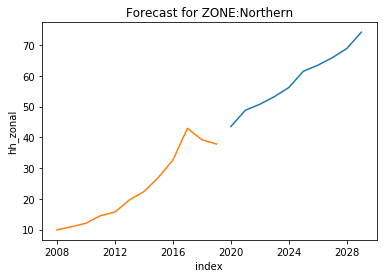

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


ZONE: North West




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  47.610959   42.280062   52.787672
1 2020-12-31  51.932147   46.962633   57.092224
2 2021-12-31  54.383314   49.162763   59.501418
3 2022-12-31  57.180840   52.218607   62.346441
4 2023-12-31  60.325219   54.765807   65.342080
5 2024-12-31  64.646407   59.451399   70.025519
6 2025-12-31  67.097574   61.696617   71.907985
7 2026-12-31  69.895100   64.748570   75.106734
8 2027-12-31  73.039479   67.445447   78.241413
9 2028-12-31  77.360667   72.104159   82.690559

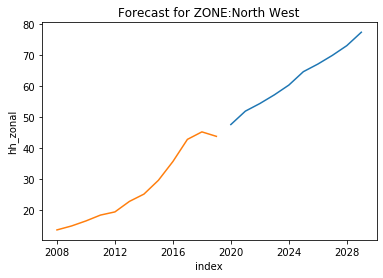

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


ZONE: Yorkshire




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  48.086434   43.588015   52.826820
1 2020-12-31  52.080728   47.446455   56.982082
2 2021-12-31  54.622273   49.955402   59.378097
3 2022-12-31  57.564161   52.797021   62.122071
4 2023-12-31  60.906740   55.700744   65.893537
5 2024-12-31  64.901033   60.056678   69.522734
6 2025-12-31  67.442578   62.579523   72.559819
7 2026-12-31  70.384466   65.511307   75.109496
8 2027-12-31  73.727045   68.829910   78.746443
9 2028-12-31  77.721338   73.006810   82.399639

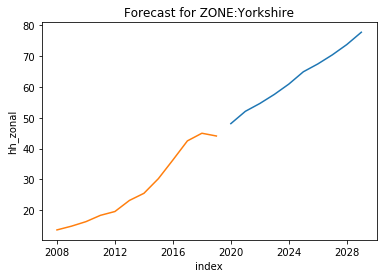

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


ZONE: N Wales & Mersey




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  48.478333   43.441464   53.749470
1 2020-12-31  52.848954   47.841085   58.481817
2 2021-12-31  55.407866   50.495834   60.794607
3 2022-12-31  58.254705   52.933042   63.383261
4 2023-12-31  61.389969   56.259092   66.721558
5 2024-12-31  65.760590   60.386772   70.951539
6 2025-12-31  68.319502   62.844887   73.715926
7 2026-12-31  71.166341   66.015787   76.498561
8 2027-12-31  74.301605   69.181563   79.616916
9 2028-12-31  78.672226   73.895686   84.128521

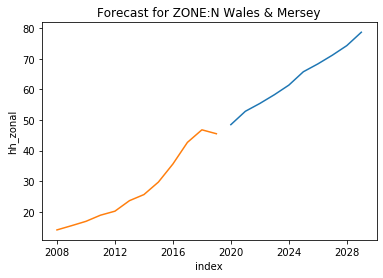

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


ZONE: East Midlands




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  51.101507   46.026596   55.992566
1 2020-12-31  54.808719   49.810618   59.794459
2 2021-12-31  57.526966   52.981323   62.251218
3 2022-12-31  60.595294   55.837790   65.299266
4 2023-12-31  64.013930   59.147873   69.019698
5 2024-12-31  67.721142   62.982640   72.547934
6 2025-12-31  70.439389   65.746063   75.230675
7 2026-12-31  73.507717   68.247178   78.798986
8 2027-12-31  76.926353   72.009883   81.559866
9 2028-12-31  80.633565   76.107190   85.890699

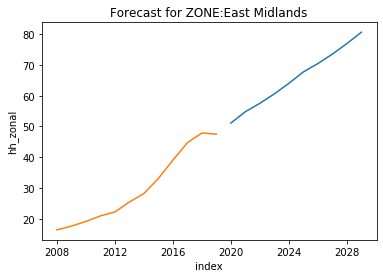

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


ZONE: Midlands




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  51.948980   47.024414   56.650173
1 2020-12-31  55.911276   51.128647   61.108586
2 2021-12-31  58.472973   53.474813   63.646471
3 2022-12-31  61.391586   56.562927   66.257661
4 2023-12-31  64.667466   59.697192   69.513699
5 2024-12-31  68.629762   63.623046   73.655076
6 2025-12-31  71.191459   65.962666   76.152357
7 2026-12-31  74.110072   69.556635   79.054323
8 2027-12-31  77.385952   72.567101   82.197868
9 2028-12-31  81.348247   76.657663   85.974782

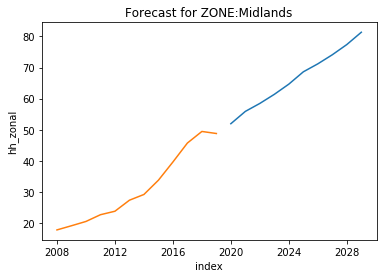

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


ZONE: Eastern




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  53.296911   48.172496   58.794907
1 2020-12-31  56.991444   51.843650   62.194659
2 2021-12-31  59.940456   54.823754   65.268656
3 2022-12-31  63.196543   57.945565   68.125419
4 2023-12-31  66.759874   61.373400   71.648416
5 2024-12-31  70.454406   65.401347   75.501621
6 2025-12-31  73.403419   67.888935   78.472665
7 2026-12-31  76.659506   71.883360   81.828160
8 2027-12-31  80.222837   74.845612   85.291469
9 2028-12-31  83.917369   78.599081   89.312632

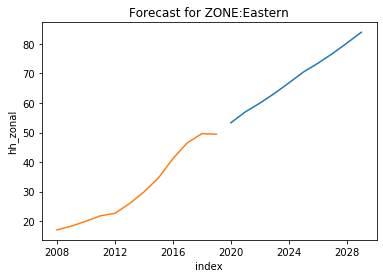

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


ZONE: South Wales




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  46.532087   40.294956   52.502528
1 2020-12-31  49.768994   43.663029   55.934327
2 2021-12-31  51.827395   45.540417   58.355745
3 2022-12-31  54.029909   47.498903   60.424577
4 2023-12-31  56.376868   50.234356   62.256100
5 2024-12-31  59.613776   53.053533   65.400722
6 2025-12-31  61.672177   55.984946   67.621896
7 2026-12-31  63.874691   57.911044   70.425293
8 2027-12-31  66.221650   60.094635   72.620035
9 2028-12-31  69.458557   62.929626   75.583592

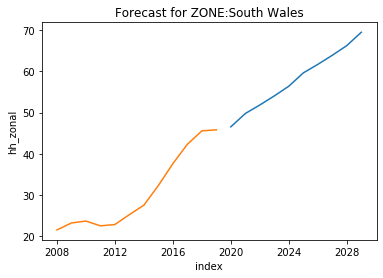

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


ZONE: South East




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  56.038874   50.861336   61.285074
1 2020-12-31  59.363422   54.002090   64.446558
2 2021-12-31  62.388012   57.050466   67.581712
3 2022-12-31  65.687407   60.378540   70.941960
4 2023-12-31  69.261673   63.996012   74.352538
5 2024-12-31  72.586221   67.524009   77.929417
6 2025-12-31  75.610812   70.034776   80.883722
7 2026-12-31  78.910207   73.703575   83.996949
8 2027-12-31  82.484473   77.141023   87.977920
9 2028-12-31  85.809021   80.463379   90.847399

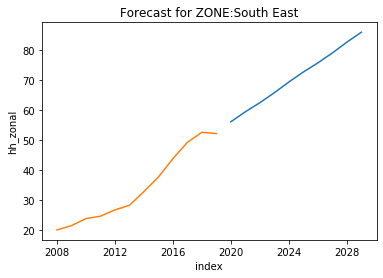

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


ZONE: London




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  58.250826   52.721713   63.638821
1 2020-12-31  62.142831   56.398028   67.771414
2 2021-12-31  64.941023   59.516994   70.943633
3 2022-12-31  68.119817   62.758114   73.926649
4 2023-12-31  71.679479   66.460991   77.356447
5 2024-12-31  75.571485   69.800391   80.665111
6 2025-12-31  78.369677   73.010820   84.157145
7 2026-12-31  81.548471   75.795317   87.442000
8 2027-12-31  85.108133   79.736704   91.114002
9 2028-12-31  89.000138   83.407931   94.751823

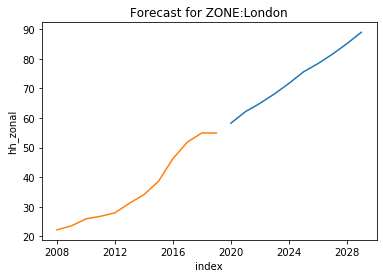

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


ZONE: Southern




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  57.232869   52.346774   61.892131
1 2020-12-31  60.791143   56.073391   65.757494
2 2021-12-31  63.647894   59.303515   68.008469
3 2022-12-31  66.909013   62.172391   71.443297
4 2023-12-31  70.574648   65.891524   74.925508
5 2024-12-31  74.132922   69.314257   78.869626
6 2025-12-31  76.989673   72.304205   81.528247
7 2026-12-31  80.250793   75.655274   84.613136
8 2027-12-31  83.916427   78.661711   88.480612
9 2028-12-31  87.474701   82.886837   91.948511

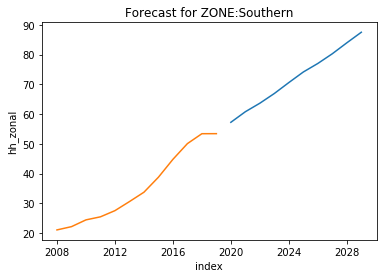

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


ZONE: South Western




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  54.839643   49.925116   59.910136
1 2020-12-31  58.072417   53.413871   62.956175
2 2021-12-31  60.464655   55.928481   65.720540
3 2022-12-31  63.293256   58.334964   67.975756
4 2023-12-31  66.558380   61.758298   71.600606
5 2024-12-31  69.791154   64.435128   74.539924
6 2025-12-31  72.183392   67.380226   76.868805
7 2026-12-31  75.011992   69.673994   79.932686
8 2027-12-31  78.277117   73.052989   83.161128
9 2028-12-31  81.509891   76.709050   86.678268

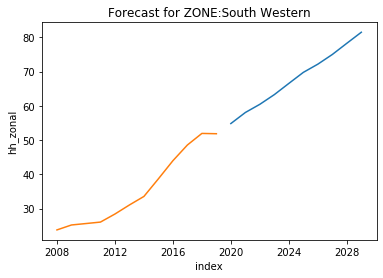

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


ZONE: Northern Scotland




ds       yhat  yhat_lower  yhat_upper
0 2019-12-31  33.337932   23.813360   42.544173
1 2020-12-31  44.019367   34.255669   53.617140
2 2021-12-31  44.853302   35.291610   54.185834
3 2022-12-31  45.980193   37.023956   55.404555
4 2023-12-31  47.402940   38.171041   56.496419
5 2024-12-31  58.084374   48.758404   68.746371
6 2025-12-31  58.918310   49.599555   68.211738
7 2026-12-31  60.045200   50.811608   70.003570
8 2027-12-31  61.467947   51.982821   70.791657
9 2028-12-31  72.149382   63.131493   81.482422

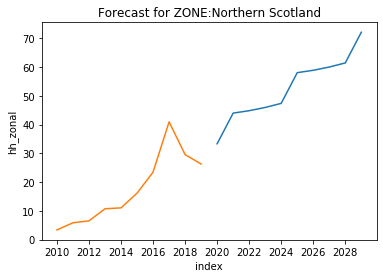

In [130]:
forecast_df = {}



for i in zones:

    temp = df[df.zone_name == i]
    #drop zone name because its not required for now
    temp.drop("zone_name",axis=1,inplace=True)
    #reseting index to make the ds col for prophet
    temp = temp.reset_index()
    #rename to ds an y, because of prophet
    temp = temp.rename(columns = {"index":"ds",
                                 "hh_zonal":"y"})
    model = Prophet(interval_width=0.95,)
    model.fit(temp)
    future_dates = model.make_future_dataframe(10,freq="Y",include_history=False)
    forecast = model.predict(future_dates)
    forecast = forecast[["ds","yhat","yhat_lower","yhat_upper"]]
    print("ZONE:",i)
    print("\n")
    display(forecast)
    
    forecast_df[i] = forecast
    model.plot_compo
    
    temp_1 = df.reset_index()
    temp_1 = temp_1[temp_1.zone_name == i]
    sns.lineplot(y = "yhat",x="ds",data=forecast)
    sns.lineplot(y="hh_zonal",x="index",data=temp_1)
    plt.title("Forecast for ZONE:"+i)
    
    
    
    plt.show()
    
    #fig = px.line(forecast.set_index("ds")["yhat"],title="ZONE:"+i)
    #fig.show()
    
    

### LSTM

In [117]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [134]:
df
n_steps = 2
for i in zones:
    print('for  ',i)
    temp = df[df.zone_name==i]
    temp.drop(["zone_name","year"],axis=1,inplace=True)
    X, y = split_sequence(temp.hh_zonal.values, n_steps)
    # summarize the data
    for i in range(len(X)):
        print(X[i], y[i])

for   Southern Scotland
[6.362303 7.950377] 9.066432
[7.950377 9.066432] 11.218687
[ 9.066432 11.218687] 11.730556
[11.218687 11.730556] 16.001744
[11.730556 16.001744] 16.789820000000002
[16.001744 16.78982 ] 21.236592
[16.78982  21.236592] 26.78932
[21.236592 26.78932 ] 40.2444525185522
[26.78932    40.24445252] 30.480981
[40.24445252 30.480981  ] 29.070427000000002
for   Northern
[ 9.884146 10.899023] 12.059398
[10.899023 12.059398] 14.523126000000001
[12.059398 14.523126] 15.684823999999999
[14.523126 15.684824] 19.662769
[15.684824 19.662769] 22.346536999999998
[19.662769 22.346537] 26.938177000000003
[22.346537 26.938177] 32.617844
[26.938177 32.617844] 42.9279532830048
[32.617844   42.92795328] 39.223189
[42.92795328 39.223189  ] 37.816827
for   North West
[13.646168 14.911638] 16.542926
[14.911638 16.542926] 18.426326
[16.542926 18.426326] 19.449161
[18.426326 19.449161] 22.838742
[19.449161 22.838742] 25.18447
[22.838742 25.18447 ] 29.640147999999996
[25.18447  29.640148] 35.6

In [136]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [137]:
#vanilla lstm
from keras.layers import LSTM,Dense
from keras.models import Sequential
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [138]:
model.fit(X, y, epochs=200, verbose=0)

Instructions for updating:
Use tf.cast instead.


In [153]:
x_input = np.array([40.9660381,
       29.577679])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[26.16815]]


array([[40.9660381],
       [29.577679 ]])

In [174]:
url = "https://investors.nationalgrid.com/news-and-reports/reports/archive/uk"

In [175]:
https://investors.nationalgrid.com/~/media/Files/N/National-Grid-IR-V2/reports/archive/uk/ng2010-ngetregs200910publish.pdf

SyntaxError: invalid syntax (<ipython-input-175-9f5046e7bf5a>, line 1)

In [ ]:
# import packages
import PyPDF2
import re

# open the pdf file
file = PyPDF2.PdfFileReader("../data/reports_from_nget/2007.pdf")

# get number of pages
NumPages = object.getNumPages()

In [ ]:
file.getPage(25)

In [ ]:
String = "Financial position"

# extract text and do the search
for i in range(0, NumPages):
    PageObj = file.getPage(i)
    print("this is page " + str(i)) 
    
    
    
    Text = PageObj.extractText() 
    #print(Text)
    ResSearch = re.search(String, Text)
    print(ResSearch)

In [ ]:
file.get

In [ ]:
import PyPDF2 
import textract

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
file_name = "../data/reports_from_nget/2007.pdf"

In [ ]:
pdfFileobj = open(file_name,"rb")

In [ ]:
pdfRead = PyPDF2.PdfFileReader(pdfFileobj)

In [ ]:
num_pages = pdfRead.getNumPages

In [ ]:
count = 0
text = ""

In [ ]:
while count < num_pages:
    pageObj = pdfRead.getPage(count)
    
    count = count + 1
    
    text+=pageObj.extractText()

In [ ]:
%pwd

In [ ]:
import os
os.chdir("Desktop/Ref_CEU/data/reports_from_nget")

In [ ]:
import PyPDF2# pdf file object
# you can find find the pdf file with complete code in belowpdfFileObj = open('example.pdf', 'rb')# pdf reader objectpdfReader = PyPDF2.PdfFileReader(pdfFileObj)# number of pages in pdfprint(pdfReader.numPages)# a page objectpageObj = pdfReader.getPage(0)# extracting text from page.

import textract

text = textract.process("2008.pdf")
print(text)# this will print the text you can also save that into Stringprint(pageObj.extractText())

In [ ]:
import re

In [ ]:
re.search(pattern = "Financtial position and Financial management",string=text.decode("utf-8"))

In [81]:
temp = df[df.zone_name=="North West"]
temp.drop(["zone_name","year"],axis=1,inplace=True)
temp

hh_zonal  nhh_zonal   residual     log_nd  inflation  \
2007-12-31  13.646168   1.734890  14.061505  20.319042   5.588235   
2008-12-31  14.911638   1.956780  15.403402  20.313523  17.130920   
2009-12-31  16.542926   2.095188  16.943694  20.260050   0.237812   
2010-12-31  18.426326   2.552189  18.558560  20.277094   5.812574   
2011-12-31  19.449161   2.736856   3.607933  20.238285  11.883410   
2012-12-31  22.838742   3.310579  22.828373  20.241926   5.010020   
2013-12-31  25.184470   3.651462  25.408454  20.230591   3.339695   
2014-12-31  29.640148   4.243585  30.052442  20.180207   0.092336   
2015-12-31  35.683316   4.874799  35.634955  20.151214  -7.749077   
2016-12-31  42.828015   5.688026  45.333826  20.127212  -2.500000   
2017-12-31  45.245665   5.878185  47.260756  20.091862   6.051282   
2018-12-31  43.806241   5.881985  46.933426  20.087578   6.866538   

            operation_cost  amortization  operating_cost  revenue  \
2007-12-31          1433.0         245.0          1443.0   1991.0   
2008-12-31          1461.0         244.0          1461.0   2106.0   
2009-12-31          1848.0         221.0          1848.0   2566.0   
2010-12-31          1693.0         240.0          1693.0   2484.0   
2011-12-31          1730.0         264.0          1730.0   2549.0   
2012-12-31          1948.0         276.0          1948.0   2813.0   
2013-12-31          2102.0         325.0          2102.0   3111.0   
2014-12-31          2375.0         341.0          2375.0   3393.0   
2015-12-31          2529.0         375.0          2529.0   3713.0   
2016-12-31          2818.0         390.0          2818.0   3979.0   
2017-12-31          3093.0         419.0          3093.0   4493.0   
2018-12-31          3125.0         464.0          3125.0   4158.0   

            total liabilities  net payroll costs  number of employees    tax  \
2007-12-31             5887.0               89.0               2073.0  126.0   
2008-12-31             6299.0               94.0               2288.0  140.0   
2009-12-31             6681.0              111.0               2352.0  153.0   
2010-12-31             6885.0               97.0               2488.0  183.0   
2011-12-31             7022.0              112.0               2784.0  139.0   
2012-12-31             8178.0              121.0               2978.0  101.0   
2013-12-31             9854.0              104.0               3229.0  161.0   
2014-12-31             9559.0              120.0               3044.0   79.0   
2015-12-31            10467.0              133.0               3270.0  203.0   
2016-12-31            10405.0              141.0               3520.0  114.0   
2017-12-31            10801.0              156.0               3692.0   87.0   
2018-12-31            10682.0              181.0               3679.0  165.0   

             adj_close        volume  
2007-12-31  393.191688  3.193817e+08  
2008-12-31  371.787890  2.007195e+08  
2009-12-31  335.913734  1.465296e+08  
2010-12-31  367.357994  1.723851e+08  
2011-12-31  434.997279  1.566390e+08  
2012-12-31  508.046112  1.361455e+08  
2013-12-31  605.459168  1.262065e+08  
2014-12-31  725.807424  1.365219e+08  
2015-12-31  779.542343  1.603617e+08  
2016-12-31  921.059987  1.468067e+08  
2017-12-31  854.296926  1.827168e+08  
2018-12-31  739.531153  2.155613e+08

In [82]:
nobs = 4
df_train, df_test = temp[0:-nobs], temp[-nobs:]

In [83]:
df_train

hh_zonal  nhh_zonal   residual     log_nd  inflation  \
2007-12-31  13.646168   1.734890  14.061505  20.319042   5.588235   
2008-12-31  14.911638   1.956780  15.403402  20.313523  17.130920   
2009-12-31  16.542926   2.095188  16.943694  20.260050   0.237812   
2010-12-31  18.426326   2.552189  18.558560  20.277094   5.812574   
2011-12-31  19.449161   2.736856   3.607933  20.238285  11.883410   
2012-12-31  22.838742   3.310579  22.828373  20.241926   5.010020   
2013-12-31  25.184470   3.651462  25.408454  20.230591   3.339695   
2014-12-31  29.640148   4.243585  30.052442  20.180207   0.092336   

            operation_cost  amortization  operating_cost  revenue  \
2007-12-31          1433.0         245.0          1443.0   1991.0   
2008-12-31          1461.0         244.0          1461.0   2106.0   
2009-12-31          1848.0         221.0          1848.0   2566.0   
2010-12-31          1693.0         240.0          1693.0   2484.0   
2011-12-31          1730.0         264.0          1730.0   2549.0   
2012-12-31          1948.0         276.0          1948.0   2813.0   
2013-12-31          2102.0         325.0          2102.0   3111.0   
2014-12-31          2375.0         341.0          2375.0   3393.0   

            total liabilities  net payroll costs  number of employees    tax  \
2007-12-31             5887.0               89.0               2073.0  126.0   
2008-12-31             6299.0               94.0               2288.0  140.0   
2009-12-31             6681.0              111.0               2352.0  153.0   
2010-12-31             6885.0               97.0               2488.0  183.0   
2011-12-31             7022.0              112.0               2784.0  139.0   
2012-12-31             8178.0              121.0               2978.0  101.0   
2013-12-31             9854.0              104.0               3229.0  161.0   
2014-12-31             9559.0              120.0               3044.0   79.0   

             adj_close        volume  
2007-12-31  393.191688  3.193817e+08  
2008-12-31  371.787890  2.007195e+08  
2009-12-31  335.913734  1.465296e+08  
2010-12-31  367.357994  1.723851e+08  
2011-12-31  434.997279  1.566390e+08  
2012-12-31  508.046112  1.361455e+08  
2013-12-31  605.459168  1.262065e+08  
2014-12-31  725.807424  1.365219e+08

In [87]:
for name,col in df_train.iteritems():
    f.adfuller_test(col,name=col.name)
    print("\n")

    Augmented Dickey-Fuller Test on "hh_zonal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 3.851
 No. Lags Chosen       = 1
 Critical value 1%     = -5.354
 Critical value 5%     = -3.646
 Critical value 10%    = -2.901
 => P-Value = 1.0. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "nhh_zonal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.9721
 No. Lags Chosen       = 2
 Critical value 1%     = -6.045
 Critical value 5%     = -3.929
 Critical value 10%    = -2.987
 => P-Value = 0.9986. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "residual" 
    -----------------------------------------------
 Null Hypothesis: Data has 

In [88]:
df_diff = df_train.diff().dropna()
df_diff

hh_zonal  nhh_zonal   residual    log_nd  inflation  \
2008-12-31  1.265470   0.221890   1.341897 -0.005519  11.542685   
2009-12-31  1.631288   0.138408   1.540292 -0.053474 -16.893108   
2010-12-31  1.883400   0.457001   1.614866  0.017044   5.574762   
2011-12-31  1.022835   0.184667 -14.950627 -0.038809   6.070836   
2012-12-31  3.389581   0.573723  19.220440  0.003641  -6.873390   
2013-12-31  2.345728   0.340883   2.580081 -0.011335  -1.670325   
2014-12-31  4.455678   0.592123   4.643988 -0.050384  -3.247359   

            operation_cost  amortization  operating_cost  revenue  \
2008-12-31            28.0          -1.0            18.0    115.0   
2009-12-31           387.0         -23.0           387.0    460.0   
2010-12-31          -155.0          19.0          -155.0    -82.0   
2011-12-31            37.0          24.0            37.0     65.0   
2012-12-31           218.0          12.0           218.0    264.0   
2013-12-31           154.0          49.0           154.0    298.0   
2014-12-31           273.0          16.0           273.0    282.0   

            total liabilities  net payroll costs  number of employees   tax  \
2008-12-31              412.0                5.0                215.0  14.0   
2009-12-31              382.0               17.0                 64.0  13.0   
2010-12-31              204.0              -14.0                136.0  30.0   
2011-12-31              137.0               15.0                296.0 -44.0   
2012-12-31             1156.0                9.0                194.0 -38.0   
2013-12-31             1676.0              -17.0                251.0  60.0   
2014-12-31             -295.0               16.0               -185.0 -82.0   

             adj_close        volume  
2008-12-31  -21.403798 -1.186622e+08  
2009-12-31  -35.874156 -5.418994e+07  
2010-12-31   31.444260  2.585553e+07  
2011-12-31   67.639285 -1.574608e+07  
2012-12-31   73.048833 -2.049354e+07  
2013-12-31   97.413055 -9.938947e+06  
2014-12-31  120.348256  1.031531e+07

In [90]:
for name,col in df_diff.iteritems():
    f.adfuller_test(col,name=col.name)

    print("\n")

    Augmented Dickey-Fuller Test on "hh_zonal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.276
 No. Lags Chosen       = 1
 Critical value 1%     = -6.045
 Critical value 5%     = -3.929
 Critical value 10%    = -2.987
 => P-Value = 0.9762. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "nhh_zonal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.5115
 No. Lags Chosen       = 1
 Critical value 1%     = -6.045
 Critical value 5%     = -3.929
 Critical value 10%    = -2.987
 => P-Value = 0.5278. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "residual" 
    -----------------------------------------------
 Null Hypothesis: Data 

In [104]:
create_lasso_feat_plot(df,zone_name="North West",)

For North West
LASSO coef:
nhh_zonal              0.000000e+00
residual               0.000000e+00
log_nd                 0.000000e+00
inflation              0.000000e+00
operation_cost         8.404540e-03
amortization           0.000000e+00
operating_cost         5.213713e-05
revenue                4.029223e-03
total liabilities     -2.229421e-03
net payroll costs      0.000000e+00
number of employees    6.361627e-03
tax                    1.521852e-02
adj_close              2.144567e-02
volume                 1.147057e-08
dtype: float64
***************************************
For North West
total features: 14
selected features: 7
features with coefficients shrank to zero: 6


Selected features:  ('operation_cost', 'operating_cost', 'revenue', 'total liabilities', 'number of employees', 'tax', 'adj_close')
***********************************************************


In [108]:
temp

hh_zonal  nhh_zonal   residual     log_nd  inflation  \
2007-12-31  13.646168   1.734890  14.061505  20.319042   5.588235   
2008-12-31  14.911638   1.956780  15.403402  20.313523  17.130920   
2009-12-31  16.542926   2.095188  16.943694  20.260050   0.237812   
2010-12-31  18.426326   2.552189  18.558560  20.277094   5.812574   
2011-12-31  19.449161   2.736856   3.607933  20.238285  11.883410   
2012-12-31  22.838742   3.310579  22.828373  20.241926   5.010020   
2013-12-31  25.184470   3.651462  25.408454  20.230591   3.339695   
2014-12-31  29.640148   4.243585  30.052442  20.180207   0.092336   
2015-12-31  35.683316   4.874799  35.634955  20.151214  -7.749077   
2016-12-31  42.828015   5.688026  45.333826  20.127212  -2.500000   
2017-12-31  45.245665   5.878185  47.260756  20.091862   6.051282   
2018-12-31  43.806241   5.881985  46.933426  20.087578   6.866538   

            operation_cost  amortization  operating_cost  revenue  \
2007-12-31          1433.0         245.0          1443.0   1991.0   
2008-12-31          1461.0         244.0          1461.0   2106.0   
2009-12-31          1848.0         221.0          1848.0   2566.0   
2010-12-31          1693.0         240.0          1693.0   2484.0   
2011-12-31          1730.0         264.0          1730.0   2549.0   
2012-12-31          1948.0         276.0          1948.0   2813.0   
2013-12-31          2102.0         325.0          2102.0   3111.0   
2014-12-31          2375.0         341.0          2375.0   3393.0   
2015-12-31          2529.0         375.0          2529.0   3713.0   
2016-12-31          2818.0         390.0          2818.0   3979.0   
2017-12-31          3093.0         419.0          3093.0   4493.0   
2018-12-31          3125.0         464.0          3125.0   4158.0   

            total liabilities  net payroll costs  number of employees    tax  \
2007-12-31             5887.0               89.0               2073.0  126.0   
2008-12-31             6299.0               94.0               2288.0  140.0   
2009-12-31             6681.0              111.0               2352.0  153.0   
2010-12-31             6885.0               97.0               2488.0  183.0   
2011-12-31             7022.0              112.0               2784.0  139.0   
2012-12-31             8178.0              121.0               2978.0  101.0   
2013-12-31             9854.0              104.0               3229.0  161.0   
2014-12-31             9559.0              120.0               3044.0   79.0   
2015-12-31            10467.0              133.0               3270.0  203.0   
2016-12-31            10405.0              141.0               3520.0  114.0   
2017-12-31            10801.0              156.0               3692.0   87.0   
2018-12-31            10682.0              181.0               3679.0  165.0   

             adj_close        volume  
2007-12-31  393.191688  3.193817e+08  
2008-12-31  371.787890  2.007195e+08  
2009-12-31  335.913734  1.465296e+08  
2010-12-31  367.357994  1.723851e+08  
2011-12-31  434.997279  1.566390e+08  
2012-12-31  508.046112  1.361455e+08  
2013-12-31  605.459168  1.262065e+08  
2014-12-31  725.807424  1.365219e+08  
2015-12-31  779.542343  1.603617e+08  
2016-12-31  921.059987  1.468067e+08  
2017-12-31  854.296926  1.827168e+08  
2018-12-31  739.531153  2.155613e+08

In [115]:
import statsmodels.api as sm
mod = sm.tsa.VARMAX(temp[["hh_zonal","operating_cost", "revenue", "number of employees"]], order=(0,1))
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())-7.749077

                                                  Statespace Model Results                                                  
Dep. Variable:     ['hh_zonal', 'operating_cost', 'revenue', 'number of employees']   No. Observations:                   12
Model:                                                                       VMA(1)   Log Likelihood                -247.470
                                                                        + intercept   AIC                            554.941
Date:                                                              Wed, 20 May 2020   BIC                            569.488
Time:                                                                      19:50:03   HQIC                           549.555
Sample:                                                                  12-31-2007                                         
                                                                       - 12-31-2018                                         


hh_zonal  operating_cost      revenue  number of employees
2019-12-31  26.401093     2125.291450  3043.212417          2925.940071
2020-12-31  27.377314     2189.668032  3116.282731          2935.892136
2021-12-31  27.377314     2189.668032  3116.282731          2935.892136
2022-12-31  27.377314     2189.668032  3116.282731          2935.892136
2023-12-31  27.377314     2189.668032  3116.282731          2935.892136
2024-12-31  27.377314     2189.668032  3116.282731          2935.892136
2025-12-31  27.377314     2189.668032  3116.282731          2935.892136
2026-12-31  27.377314     2189.668032  3116.282731          2935.892136
2027-12-31  27.377314     2189.668032  3116.282731          2935.892136
2028-12-31  27.377314     2189.668032  3116.282731          2935.892136

In [114]:
temp

hh_zonal  nhh_zonal   residual     log_nd  inflation  \
2007-12-31  13.646168   1.734890  14.061505  20.319042   5.588235   
2008-12-31  14.911638   1.956780  15.403402  20.313523  17.130920   
2009-12-31  16.542926   2.095188  16.943694  20.260050   0.237812   
2010-12-31  18.426326   2.552189  18.558560  20.277094   5.812574   
2011-12-31  19.449161   2.736856   3.607933  20.238285  11.883410   
2012-12-31  22.838742   3.310579  22.828373  20.241926   5.010020   
2013-12-31  25.184470   3.651462  25.408454  20.230591   3.339695   
2014-12-31  29.640148   4.243585  30.052442  20.180207   0.092336   
2015-12-31  35.683316   4.874799  35.634955  20.151214  -7.749077   
2016-12-31  42.828015   5.688026  45.333826  20.127212  -2.500000   
2017-12-31  45.245665   5.878185  47.260756  20.091862   6.051282   
2018-12-31  43.806241   5.881985  46.933426  20.087578   6.866538   

            operation_cost  amortization  operating_cost  revenue  \
2007-12-31          1433.0         245.0          1443.0   1991.0   
2008-12-31          1461.0         244.0          1461.0   2106.0   
2009-12-31          1848.0         221.0          1848.0   2566.0   
2010-12-31          1693.0         240.0          1693.0   2484.0   
2011-12-31          1730.0         264.0          1730.0   2549.0   
2012-12-31          1948.0         276.0          1948.0   2813.0   
2013-12-31          2102.0         325.0          2102.0   3111.0   
2014-12-31          2375.0         341.0          2375.0   3393.0   
2015-12-31          2529.0         375.0          2529.0   3713.0   
2016-12-31          2818.0         390.0          2818.0   3979.0   
2017-12-31          3093.0         419.0          3093.0   4493.0   
2018-12-31          3125.0         464.0          3125.0   4158.0   

            total liabilities  net payroll costs  number of employees    tax  \
2007-12-31             5887.0               89.0               2073.0  126.0   
2008-12-31             6299.0               94.0               2288.0  140.0   
2009-12-31             6681.0              111.0               2352.0  153.0   
2010-12-31             6885.0               97.0               2488.0  183.0   
2011-12-31             7022.0              112.0               2784.0  139.0   
2012-12-31             8178.0              121.0               2978.0  101.0   
2013-12-31             9854.0              104.0               3229.0  161.0   
2014-12-31             9559.0              120.0               3044.0   79.0   
2015-12-31            10467.0              133.0               3270.0  203.0   
2016-12-31            10405.0              141.0               3520.0  114.0   
2017-12-31            10801.0              156.0               3692.0   87.0   
2018-12-31            10682.0              181.0               3679.0  165.0   

             adj_close        volume  
2007-12-31  393.191688  3.193817e+08  
2008-12-31  371.787890  2.007195e+08  
2009-12-31  335.913734  1.465296e+08  
2010-12-31  367.357994  1.723851e+08  
2011-12-31  434.997279  1.566390e+08  
2012-12-31  508.046112  1.361455e+08  
2013-12-31  605.459168  1.262065e+08  
2014-12-31  725.807424  1.365219e+08  
2015-12-31  779.542343  1.603617e+08  
2016-12-31  921.059987  1.468067e+08  
2017-12-31  854.296926  1.827168e+08  
2018-12-31  739.531153  2.155613e+08

In [156]:
from statsmodels.tsa.api import ARIMA

In [159]:
model = ARIMA(endog=temp.hh_zonal,order=(1,0,0),exog=temp.inflation)

In [160]:
res = model.fit(maxlags = 1)

In [161]:
pd.Series(res.forecast(temp.values,steps=20)[3],index=temp.columns)

TypeError: forecast() got multiple values for argument 'steps'

In [164]:
res.forecast(steps = 20,exog=temp.inflation)

ValueError: new exog needed for each step

In [166]:
from statsmodels.tsa.ar_model import AutoReg

In [169]:
model = AutoReg(temp.hh_zonal, lags=1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(temp)+1, len(temp)+1)
print(yhat)

ValueError: Length of passed values is 2, index implies 1.

2007-12-31          NaN
2008-12-31    16.229734
2009-12-31    17.511609
2010-12-31    19.164044
2011-12-31    21.071859
2012-12-31    22.107954
2013-12-31    25.541476
2014-12-31    27.917612
2015-12-31    32.431051
2016-12-31    38.552560
2017-12-31    45.789879
2018-12-31    48.238870
Freq: A-DEC, dtype: float64

In [196]:
model1=sm.OLS(endog=temp['hh_zonal'],exog=temp[[operation_cost', 'operating_cost', 'revenue', 'total liabilities', 'number of employees', 'tax', 'adj_close']])
results1=model1.fit()
print(results1.summary())

SyntaxError: invalid syntax (<ipython-input-196-ad97ca8f17ef>, line 1)

In [191]:
temp[["inflation","operation_cost"]].values

array([[ 5.588235e+00,  1.433000e+03],
       [ 1.713092e+01,  1.461000e+03],
       [ 2.378121e-01,  1.848000e+03],
       [ 5.812574e+00,  1.693000e+03],
       [ 1.188341e+01,  1.730000e+03],
       [ 5.010020e+00,  1.948000e+03],
       [ 3.339695e+00,  2.102000e+03],
       [ 9.233610e-02,  2.375000e+03],
       [-7.749077e+00,  2.529000e+03],
       [-2.500000e+00,  2.818000e+03],
       [ 6.051282e+00,  3.093000e+03],
       [ 6.866538e+00,  3.125000e+03]])

In [258]:
temp.columns = [i.replace(" ","_") for i in temp.columns]

In [259]:
temp

hh_zonal  nhh_zonal   residual     log_nd  inflation  \
2007-12-31  13.646168   1.734890  14.061505  20.319042   5.588235   
2008-12-31  14.911638   1.956780  15.403402  20.313523  17.130920   
2009-12-31  16.542926   2.095188  16.943694  20.260050   0.237812   
2010-12-31  18.426326   2.552189  18.558560  20.277094   5.812574   
2011-12-31  19.449161   2.736856   3.607933  20.238285  11.883410   
2012-12-31  22.838742   3.310579  22.828373  20.241926   5.010020   
2013-12-31  25.184470   3.651462  25.408454  20.230591   3.339695   
2014-12-31  29.640148   4.243585  30.052442  20.180207   0.092336   
2015-12-31  35.683316   4.874799  35.634955  20.151214  -7.749077   
2016-12-31  42.828015   5.688026  45.333826  20.127212  -2.500000   
2017-12-31  45.245665   5.878185  47.260756  20.091862   6.051282   
2018-12-31  43.806241   5.881985  46.933426  20.087578   6.866538   

            operation_cost  amortization  operating_cost  revenue  \
2007-12-31          1433.0         245.0          1443.0   1991.0   
2008-12-31          1461.0         244.0          1461.0   2106.0   
2009-12-31          1848.0         221.0          1848.0   2566.0   
2010-12-31          1693.0         240.0          1693.0   2484.0   
2011-12-31          1730.0         264.0          1730.0   2549.0   
2012-12-31          1948.0         276.0          1948.0   2813.0   
2013-12-31          2102.0         325.0          2102.0   3111.0   
2014-12-31          2375.0         341.0          2375.0   3393.0   
2015-12-31          2529.0         375.0          2529.0   3713.0   
2016-12-31          2818.0         390.0          2818.0   3979.0   
2017-12-31          3093.0         419.0          3093.0   4493.0   
2018-12-31          3125.0         464.0          3125.0   4158.0   

            total_liabilities  net_payroll_costs  number_of_employees    tax  \
2007-12-31             5887.0               89.0               2073.0  126.0   
2008-12-31             6299.0               94.0               2288.0  140.0   
2009-12-31             6681.0              111.0               2352.0  153.0   
2010-12-31             6885.0               97.0               2488.0  183.0   
2011-12-31             7022.0              112.0               2784.0  139.0   
2012-12-31             8178.0              121.0               2978.0  101.0   
2013-12-31             9854.0              104.0               3229.0  161.0   
2014-12-31             9559.0              120.0               3044.0   79.0   
2015-12-31            10467.0              133.0               3270.0  203.0   
2016-12-31            10405.0              141.0               3520.0  114.0   
2017-12-31            10801.0              156.0               3692.0   87.0   
2018-12-31            10682.0              181.0               3679.0  165.0   

             adj_close        volume  
2007-12-31  393.191688  3.193817e+08  
2008-12-31  371.787890  2.007195e+08  
2009-12-31  335.913734  1.465296e+08  
2010-12-31  367.357994  1.723851e+08  
2011-12-31  434.997279  1.566390e+08  
2012-12-31  508.046112  1.361455e+08  
2013-12-31  605.459168  1.262065e+08  
2014-12-31  725.807424  1.365219e+08  
2015-12-31  779.542343  1.603617e+08  
2016-12-31  921.059987  1.468067e+08  
2017-12-31  854.296926  1.827168e+08  
2018-12-31  739.531153  2.155613e+08

In [197]:
import pyflux as pf

In [262]:
model = pf.ARIMAX(data=temp, formula='hh_zonal~1+log_nd+inflation+total_liabilities+',ar=1, ma=0, family=pf.Normal())
x = model.fit("MLE")
x.summary()

Normal ARIMAX(1,0,0)                                                                                      
======================================================= ==================================================
Dependent Variable: hh_zonal                            Method: MLE                                       
Start Date: 2008-12-31 00:00:00                         Log Likelihood: -20.1814                          
End Date: 2018-12-31 00:00:00                           AIC: 52.3629                                      
Number of observations: 11                              BIC: 54.7503                                      
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    0.8608     0.2936     2.9318   0.0034   (0.2853 | 1.4362)        
Beta 1                               

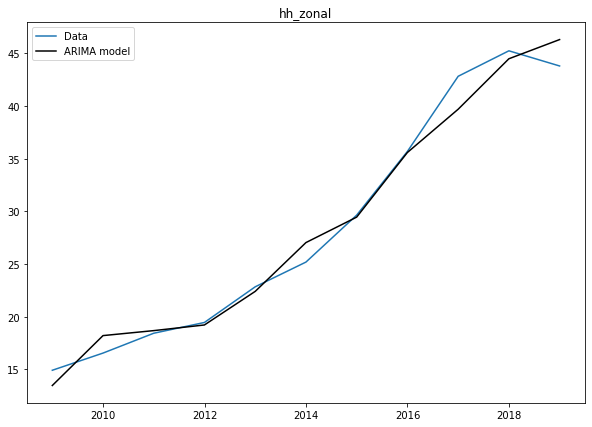

In [263]:
model.plot_fit()

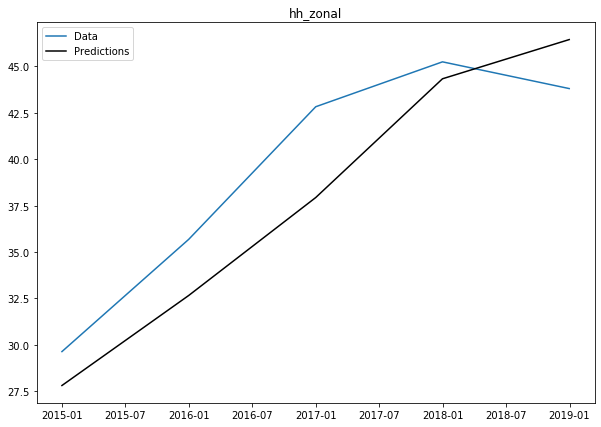

In [299]:
model.plot_predict_is(h=5)

In [303]:
model.predict(oos_data=temp,h=10)

hh_zonal
2019-12-29  41.362255
2020-12-28  37.321206
2021-12-28  37.492431
2022-12-29  36.708177
2023-12-29  34.948514
2024-12-28  35.745475
2025-12-28  38.146093
2026-12-29  40.609790
2027-12-29  45.028344
2028-12-28  47.744725